In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dtype_spec = {
    'TRDTYPE': 'int64',
    'USASTATE': 'str',
    'COMMODITY2': 'category',
    'DISAGMOT': 'category',
    'MEXSTATE': 'str',
    'CANPROV': 'str',
    'COUNTRY': 'category',
    'VALUE': 'float64',  # Changed to float64 to handle potential NA values
    'SHIPWT': 'int64',
    'FREIGHT_CHARGES': 'int64',
    'DF': 'category',
    'CONTCODE': 'str',
    'MONTH': 'category',
    'YEAR': 'float64',
    'DEPE': 'str'
}

In [3]:
transport_data = pd.read_csv('combined_data.csv', dtype=dtype_spec)

In [4]:
# high-level overview of data shape and composition
print(transport_data.shape)
print(transport_data.dtypes)
print(transport_data.head(5))

(36347182, 15)
TRDTYPE               int64
USASTATE             object
COMMODITY2         category
DISAGMOT           category
MEXSTATE             object
CANPROV              object
COUNTRY            category
VALUE               float64
SHIPWT                int64
FREIGHT_CHARGES       int64
DF                 category
CONTCODE             object
MONTH              category
YEAR                float64
DEPE                 object
dtype: object
   TRDTYPE USASTATE COMMODITY2 DISAGMOT MEXSTATE CANPROV COUNTRY     VALUE  \
0        1       AK        2.0        5       BC     NaN    2010   34800.0   
1        1       AK        2.0        5       CM     NaN    2010   36055.0   
2        1       AK        3.0        3      NaN      XQ    1220    2979.0   
3        1       AK        3.0        5      NaN      XC    1220  678610.0   
4        1       AK        3.0        5      NaN      XC    1220   53448.0   

   SHIPWT  FREIGHT_CHARGES   DF CONTCODE MONTH    YEAR DEPE  
0       0           

In [5]:
transport_data.sample(5)

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,DEPE
8177699,2,OK,47.0,6,NaN,XA,1220,158634.0,335708,55779,NaN,0,3.0,2023.0,NaN
35576024,1,MI,39.0,5,BC,NaN,2010,5755734.0,0,0,1.0,0,2.0,2022.0,NaN
12540071,1,WI,19.0,5,NaN,XC,1220,178649.0,0,2546,1.0,X,4.0,2023.0,NaN
17082361,2,KY,44.0,5,NaN,XC,1220,162720.0,430908,281,NaN,0,3.0,2021.0,NaN
7461630,1,NaN,86.0,5,NaN,NaN,1220,1072180.0,0,8231,2.0,X,1.0,2023.0,0901


In [6]:
transport_data.tail()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,DEPE
36347177,2,NaN,98.0,3,NaN,NaN,2010,1125815.0,4166,10369,NaN,0,11.0,2022.0,55XX
36347178,2,NaN,98.0,5,NaN,NaN,1220,5130164.0,30210,54480,NaN,0,11.0,2022.0,55XX
36347179,2,NaN,89.0,8,NaN,NaN,1220,161398.0,16417,3327,NaN,0,11.0,2022.0,60XX
36347180,2,NaN,99.0,8,NaN,NaN,1220,224511642.0,0,0,NaN,0,11.0,2022.0,70XX
36347181,2,NaN,99.0,8,NaN,NaN,2010,227080871.0,0,0,NaN,0,11.0,2022.0,70XX


In [7]:
transport_data.describe()

,TRDTYPE,VALUE,SHIPWT,FREIGHT_CHARGES,YEAR
count,3.634718e+07,3.634718e+07,3.634718e+07,3.634718e+07,3.634718e+07
mean,1.335953e+00,3.066914e+06,1.285550e+06,4.103721e+04,2.021559e+03
std,4.723226e-01,5.087033e+07,5.550722e+07,1.394469e+06,1.044544e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03
25%,1.000000e+00,1.429800e+04,0.000000e+00,0.000000e+00,2.021000e+03
50%,1.000000e+00,7.174700e+04,0.000000e+00,2.560000e+02,2.022000e+03
75%,2.000000e+00,4.328630e+05,2.560000e+03,2.902000e+03,2.022000e+03
max,2.000000e+00,5.277201e+10,9.237851e+10,2.354838e+09,2.024000e+03


In [8]:
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36347182 entries, 0 to 36347181
Data columns (total 15 columns):
 #   Column           Dtype   
---  ------           -----   
 0   TRDTYPE          int64   
 1   USASTATE         object  
 2   COMMODITY2       category
 3   DISAGMOT         category
 4   MEXSTATE         object  
 5   CANPROV          object  
 6   COUNTRY          category
 7   VALUE            float64 
 8   SHIPWT           int64   
 9   FREIGHT_CHARGES  int64   
 10  DF               category
 11  CONTCODE         object  
 12  MONTH            category
 13  YEAR             float64 
 14  DEPE             object  
dtypes: category(5), float64(2), int64(3), object(5)
memory usage: 2.9+ GB


In [9]:
#Confirm if all the years have been included in the merge
transport_data.YEAR.value_counts()

YEAR
2021.0    11938753
2022.0    11275949
2020.0     6104767
2023.0     5919169
2024.0     1108543
Name: count, dtype: int64

In [10]:
display(transport_data.isnull().sum())

TRDTYPE                   0
USASTATE            5200499
COMMODITY2          8332618
DISAGMOT                  0
MEXSTATE           26200842
CANPROV            17373601
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                 12210951
CONTCODE                  0
MONTH                496662
YEAR                      1
DEPE               22814065
dtype: int64

In [11]:
transport_data.CONTCODE.value_counts()

CONTCODE
0    20153753
X    13330950
1     2862479
Name: count, dtype: int64

# DATA CLEANING

In [12]:
# Make copy of original pieces of data
transport_data_clean = transport_data.copy()

Issue #1: Rename Columns

Define: Rename Columns from Block Letters to lowercase

Code:

In [13]:
# Rename columns to lowercase
transport_data_clean.columns = transport_data_clean.columns.str.lower()

Test:

In [14]:
transport_data_clean.head()

,trdtype,usastate,commodity2,disagmot,mexstate,canprov,country,value,shipwt,freight_charges,df,contcode,month,year,depe
0,1,AK,2.0,5,BC,NaN,2010,34800.0,0,0,1.0,0,1.0,2020.0,NaN
1,1,AK,2.0,5,CM,NaN,2010,36055.0,0,0,1.0,0,1.0,2020.0,NaN
2,1,AK,3.0,3,NaN,XQ,1220,2979.0,236,40,1.0,X,1.0,2020.0,NaN
3,1,AK,3.0,5,NaN,XC,1220,678610.0,0,13524,1.0,X,1.0,2020.0,NaN
4,1,AK,3.0,5,NaN,XC,1220,53448.0,0,732,2.0,X,1.0,2020.0,NaN


Issue #2: Column Values with Decimal point

Define: Remove the trailing .0 values for columns month, dp, year, commodity2

Code:

In [15]:
# Roundup Column values

# List of columns to rounded up
columns_to_clean = ['commodity2', 'df', 'month', 'year']

# Function to remove trailing .0 
def remove_trailing_zero(x):
    if pd.isna(x):
        return x
    try:
        # Convert to float first to handle string numbers
        x_float = float(x)
        # Return as int if whole number, otherwise as float
        return int(x_float) if x_float.is_integer() else x_float
    except (ValueError, TypeError):
        return x  # Return non-numeric values as-is

# Apply to all specified columns
for col in columns_to_clean:
    transport_data_clean[col] = transport_data_clean[col].map(remove_trailing_zero)

Test:

In [16]:
transport_data_clean.sample(5)

,trdtype,usastate,commodity2,disagmot,mexstate,canprov,country,value,shipwt,freight_charges,df,contcode,month,year,depe
19773375,1,RI,51,5,NaN,XO,1220,31326.0,0,711,2,X,7,2021.0,NaN
21588682,2,IA,NaN,6,NaN,XS,1220,2652052.0,9420140,54830,NaN,0,7,2022.0,3401
26250232,2,NH,33,5,NaN,XQ,1220,16849.0,1289,201,NaN,0,7,2022.0,NaN
28343471,1,GA,52,5,NaN,XM,1220,117835.0,0,2309,1,X,3,2020.0,NaN
5761645,1,VA,NaN,3,NaN,XA,1220,2766.0,4,28,1,X,6,2022.0,2006


Issue #3: Year Column values still have a decimal place

Define: Roundup Column values for the year column to remove the decimal point

Code

In [17]:
transport_data_clean['year'] = transport_data_clean['year'].round(0).astype('Int64')

Test

In [18]:
transport_data_clean.sample(3)

,trdtype,usastate,commodity2,disagmot,mexstate,canprov,country,value,shipwt,freight_charges,df,contcode,month,year,depe
9569244,1,OH,96,5,MX,NaN,2010,319025.0,0,0,1,0,4,2021,NaN
97757,1,MN,90,5,BC,NaN,2010,1090436.0,0,0,1,0,2,2020,NaN
16231049,1,NJ,38,5,TM,NaN,2010,4323.0,0,0,2,0,5,2021,NaN


Issue #4: Ensure commodity2 has two digit codes

Define: Add the preceeding zeros for the single values in commodity2 that had been removed.

Code

In [19]:
#  Convert to string and zero-pad single digits since the datatype for commodity2 was category
transport_data_clean['commodity2'] = (
    transport_data_clean['commodity2']
    .astype(str)  # Ensure string type
    .str.zfill(2)  # Pad with leading zeros (e.g., "1" → "01")
)

# Convert back to category (if needed)
transport_data_clean['commodity2'] = transport_data_clean['commodity2'].astype('category')

Test

In [20]:
print(transport_data_clean.commodity2.dtypes)
print(transport_data_clean.sample(6))

category
          trdtype usastate commodity2 disagmot mexstate canprov country  \
8621223         1       TX         56        5       SL     NaN    2010   
5154907         1       DE        nan        5       NL     NaN    2010   
9419285         1       TX        nan        3      NaN      XQ    1220   
11204090        2       IN         87        5      NaN      XN    1220   
9677349         2       CA         58        5      NaN      XO    1220   
18520404        2       KS         63        5      NaN      XA    1220   

              value  shipwt  freight_charges   df contcode month  year  depe  
8621223     17220.0       0                0    2        0     7  2021   NaN  
5154907   1701739.0       0                0    1        0     2  2023  2304  
9419285     82019.0    1393             3395    2        X     4  2021  29XX  
11204090   441330.0   42431             3531  NaN        0     1  2022   NaN  
9677349    106080.0   15511             1206  NaN        0     1  2021

Issue #5: Missing Values in Columns (High Count) and Impute missing values

Define: Drop columns with a high percentage of missing values and Impute missing values in 'df', 'month'and 'year' with the mode

Code:

In [21]:
# Calculate the percentage of missing values for each column
missing_values_percentage = (transport_data_clean.isnull().sum() / len(transport_data_clean)) * 100
print("Percentage of missing values per column:")
print(missing_values_percentage)

# Identify columns with missing values
cols_with_missing = missing_values_percentage[missing_values_percentage > 0].index.tolist()

# Investigate columns with missing values
print("\nInvestigation of columns with missing values:")
for col in cols_with_missing:
    print(f"\nColumn: {col}")
    print(f"Data type: {transport_data_clean[col].dtype}")
    # Display unique values for columns with a reasonable number of unique values
    if transport_data_clean[col].nunique() < 50:
        print(f"Unique values: {transport_data_clean[col].unique()}")
    else:
        print(f"Number of unique values: {transport_data_clean[col].nunique()}")
        print(f"Sample unique values: {transport_data_clean[col].unique()[:10]}")

Percentage of missing values per column:
trdtype             0.000000
usastate           14.307846
commodity2          0.000000
disagmot            0.000000
mexstate           72.084934
canprov            47.799032
country             0.000000
value               0.000000
shipwt              0.000000
freight_charges     0.000000
df                 33.595317
contcode            0.000000
month               1.366439
year                0.000003
depe               62.767081
dtype: float64

Investigation of columns with missing values:

Column: usastate
Data type: object
Number of unique values: 52
Sample unique values: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU']

Column: mexstate
Data type: object
Unique values: ['BC' 'CM' nan 'DG' 'SO' 'XX' 'QT' 'DF' 'MX' 'CO' 'JA' 'TL' 'PU' 'NL' 'SL'
 'GT' 'AG' 'HG' 'MO' 'CH' 'OT' 'TM' 'ZA' 'SI' 'VE' 'MI' 'BS' 'YU' 'CL'
 'CS' 'QR' 'GR' 'OA' 'TB']

Column: canprov
Data type: object
Unique values: [nan 'XQ' 'XC' 'XO' 'XY' 'XS' 'XA' 'XM' 'XB' 'XW' 

I decided to first drop the columns with a very high percentage of missing values (mexstate, canprov, and depe) because they had over 30% missing data

In [22]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['mexstate', 'canprov', 'depe']
transport_data_clean = transport_data_clean.drop(columns=columns_to_drop)

# Impute missing values in 'df' and 'month' with the mode
for col in ['df', 'month']:
    if transport_data_clean[col].isnull().any():
        mode_value = transport_data_clean[col].mode()[0]
        transport_data_clean[col] = transport_data_clean[col].fillna(mode_value)

# Impute missing value in 'year' with the mode
if transport_data_clean['year'].isnull().any():
    mode_year = transport_data_clean['year'].mode()[0]
    transport_data_clean['year'] = transport_data_clean['year'].fillna(mode_year)


Test:

In [23]:
# Verify that there are no more missing values in the relevant columns
print("Missing values after handling:")
display(transport_data_clean.isnull().sum())

Missing values after handling:


trdtype                  0
usastate           5200499
commodity2               0
disagmot                 0
country                  0
value                    0
shipwt                   0
freight_charges          0
df                       0
contcode                 0
month                    0
year                     0
dtype: int64

Issue #6: Missing Values in "usastate" Column

Define: Drop the column usastate to ensure our data is of the highest quality.

Code

In [24]:
# Drop columns usastate
transport_data_clean  = transport_data_clean.drop('usastate', axis=1)

Test

In [25]:
transport_data_clean.head(4)

,trdtype,commodity2,disagmot,country,value,shipwt,freight_charges,df,contcode,month,year
0,1,02,5,2010,34800.0,0,0,1,0,1,2020
1,1,02,5,2010,36055.0,0,0,1,0,1,2020
2,1,03,3,1220,2979.0,236,40,1,X,1,2020
3,1,03,5,1220,678610.0,0,13524,1,X,1,2020


Issue #7: contcode has some values to be 1

Define: Drop the rows where the column value for contcode is 1

In [26]:
# Drop rows where 'CONTCODE' is '1'
transport_data_clean = transport_data_clean[transport_data_clean['contcode'] != '1']

Test

In [27]:
# Verify the rows have been dropped by checking the unique values in 'CONTCODE' again
print("Unique values and counts for 'CONTCODE' column after dropping rows with '1':")
display(transport_data_clean['contcode'].value_counts())

Unique values and counts for 'CONTCODE' column after dropping rows with '1':


contcode
0    20153753
X    13330950
Name: count, dtype: int64

Issue #8: Perform Mapping

Define: Perform necessary mapping for all categorical data that have been represented by alpha numeric values

Code

In [28]:
print("Unique values in 'contcode':", transport_data_clean['contcode'].unique())
print("Datatype of 'contcode':", transport_data_clean['contcode'].dtype)

Unique values in 'contcode': ['0' 'X']
Datatype of 'contcode': object


In [29]:
# Trade Type Mapping dictionary
trdtype_mapping = {
    1: 'Export', 
    2: 'Import',
}

# Apply mapping
transport_data_clean['trdtype'] = transport_data_clean['trdtype'].map(trdtype_mapping)

In [30]:
# Transport Mode Mapping dictionary
disagmot_mapping = {'1' : 'Vessel', '3' : 'Air', '4' : 'Mail(U.S Postal Service)' , '5': 'Truck' , 
           '6': 'Rail' , '7' : 'Pipeline' , '8' : 'Other', '9' : 'Foreign Trade Zones (FTZs)'
}

# Apply mapping
transport_data_clean['disagmot'] = transport_data_clean['disagmot'].map(disagmot_mapping)

In [31]:
# Country Mapping dictionary
country_mapping = {'1220':'Canada', '2010' : 'Mexico'
}

# Apply mapping
transport_data_clean['country'] = transport_data_clean['country'].map(country_mapping)

In [32]:
# Merchandise Mapping dictionary
df_mapping = {
    1 : 'Domestically produced merchandise' , 
    2 : 'Foreign produced merchandise',
}

# Apply mapping
transport_data_clean['df'] = transport_data_clean['df'].map(df_mapping)

In [33]:
# Container Code dictionary
contcode_mapping = {
    '0': 'Non-containerized',
    'X': 'Containerized',
}

# Apply mapping to the 'contcode' column
transport_data_clean['contcode'] = transport_data_clean['contcode'].map(contcode_mapping)

In [34]:
# Month Mapping dictionary
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Apply mapping
transport_data_clean['month'] = transport_data_clean['month'].map(month_mapping)

Test

In [35]:
# After applying mappings, check unique values in each column
print("Transport Mode Mapped Values:", transport_data_clean['trdtype'] .unique())
print("Transport Mode Mapped Values:", transport_data_clean['disagmot'].unique())
print("Country Mapped Values:", transport_data_clean['country'].unique())
print("Merchandise Mapped Values:", transport_data_clean['df'].unique())
print("Container Code Mapped Values:", transport_data_clean['contcode'].unique())
print("Month Mapped Values:", transport_data_clean['month'].unique())

Transport Mode Mapped Values: ['Export' 'Import']
Transport Mode Mapped Values: ['Truck', 'Air', 'Vessel', 'Other', 'Rail', 'Pipeline', 'Mail(U.S Postal Service)', 'Foreign Trade Zones (FTZs)']
Categories (8, object): ['Vessel', 'Air', 'Mail(U.S Postal Service)', 'Truck', 'Rail', 'Pipeline', 'Other', 'Foreign Trade Zones (FTZs)']
Country Mapped Values: ['Mexico', 'Canada']
Categories (2, object): ['Canada', 'Mexico']
Merchandise Mapped Values: ['Domestically produced merchandise', 'Foreign produced merchandise']
Categories (2, object): ['Domestically produced merchandise', 'Foreign produced merchandise']
Container Code Mapped Values: ['Non-containerized' 'Containerized']
Month Mapped Values: ['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Dec', 'Nov', 'Oct']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Dec', 'Nov', 'Oct']


# EXPLORE DATA FURTHER

In [36]:
transport_data_clean.trdtype.value_counts()

trdtype
Export    22893003
Import    10591700
Name: count, dtype: int64

In [37]:
transport_data_clean.commodity2.value_counts()

commodity2
nan    7578853
84     1293064
85     1145039
39     1042886
87      911714
        ...   
53       26874
24       25550
45       24526
50        9100
99        1200
Name: count, Length: 99, dtype: int64

In [38]:
transport_data_clean.disagmot.value_counts()

disagmot
Truck                         22582168
Air                            6160708
Rail                           2902459
Other                          1226003
Vessel                          371946
Foreign Trade Zones (FTZs)      124820
Pipeline                         73486
Mail(U.S Postal Service)         43113
Name: count, dtype: int64

In [39]:
transport_data_clean.country.value_counts()

country
Canada    21022548
Mexico    12462155
Name: count, dtype: int64

In [40]:
transport_data_clean.df.value_counts()

df
Domestically produced merchandise    25676818
Foreign produced merchandise          7807885
Name: count, dtype: int64

In [41]:
transport_data_clean.month.value_counts()

month
Jan    5494648
Feb    4656084
Mar    4449030
Apr    3848681
May    3420740
Jun    3020553
Jul    2654846
Aug    2018001
Sep    1563225
Oct    1022697
Nov     786051
Dec     550147
Name: count, dtype: int64

In [42]:
transport_data_clean.describe()

,value,shipwt,freight_charges,year
count,3.348470e+07,3.348470e+07,3.348470e+07,33484703.0
mean,3.203061e+06,1.294889e+06,4.159845e+04,2021.560477
std,5.290402e+07,5.769299e+07,1.445636e+06,1.045097
min,0.000000e+00,0.000000e+00,0.000000e+00,2020.0
25%,1.396700e+04,0.000000e+00,0.000000e+00,2021.0
50%,7.028900e+04,0.000000e+00,2.730000e+02,2022.0
75%,4.307790e+05,1.428000e+03,2.871000e+03,2022.0
max,5.277201e+10,9.237851e+10,2.354838e+09,2024.0


# Further DATA Cleaning

#Issue 9: Change the column name of commodity2

Define: Change the column name of commodity2 to commodity

Code

In [43]:
# Rename the 'commodity2' column to 'commodity'
transport_data_cleaned = transport_data_clean.rename(columns={'commodity2': 'commodity'})

Test

In [44]:
# Display the first few rows to verify the change
print("DataFrame after renaming 'commodity2' to 'commodity':")
display(transport_data_cleaned.head())

DataFrame after renaming 'commodity2' to 'commodity':


,trdtype,commodity,disagmot,country,value,shipwt,freight_charges,df,contcode,month,year
0,Export,02,Truck,Mexico,34800.0,0,0,Domestically produced merchandise,Non-containerized,Jan,2020
1,Export,02,Truck,Mexico,36055.0,0,0,Domestically produced merchandise,Non-containerized,Jan,2020
2,Export,03,Air,Canada,2979.0,236,40,Domestically produced merchandise,Containerized,Jan,2020
3,Export,03,Truck,Canada,678610.0,0,13524,Domestically produced merchandise,Containerized,Jan,2020
4,Export,03,Truck,Canada,53448.0,0,732,Foreign produced merchandise,Containerized,Jan,2020


#Issue 10: 'nan' strings in commodity Column

Define: Drop rows with nan strings in the 'commodity' column

Code

In [45]:
# Drop rows with nan in the 'commodity' column
transport_data_final = transport_data_cleaned[transport_data_cleaned['commodity'] != 'nan'].copy()

Test

In [46]:
# Print the shape of the new DataFrame to see how many rows were dropped
print(f"Original shape: {transport_data_cleaned.shape}")
print(f"Shape after dropping NaNs in 'commodity': {transport_data_final.shape}")

Original shape: (33484703, 11)
Shape after dropping NaNs in 'commodity': (25905850, 11)


In [47]:
transport_data_final.commodity.value_counts()

commodity
84     1293064
85     1145039
39     1042886
87      911714
90      886756
        ...   
24       25550
45       24526
50        9100
99        1200
nan          0
Name: count, Length: 99, dtype: int64

Make Copy of Cleaned data for EDA

In [48]:
# Make copies of cleaned data
transport_data_graph = transport_data_final.copy()

## DATA Visualization

In [49]:
# Define the number of samples and sample size
num_samples = 4
sample_size = 1000000

# Create a list to store the sampled DataFrames
sampled_dataframes = []

# Check if the DataFrame has enough rows to create the samples
if len(transport_data_graph) >= num_samples * sample_size:
    # Create multiple random samples
    for i in range(num_samples):
        # Using a different random_state for each sample to ensure different samples
        sample = transport_data_graph.sample(n=sample_size, random_state=42 + i)
        sampled_dataframes.append(sample)
    print(f"Created {num_samples} sampled DataFrames, each with {sample_size} rows.")
else:
    print("The DataFrame is not large enough to create the requested number and size of samples.")
    print(f"DataFrame size: {len(transport_data_graph)}")
    print(f"Requested total sample size: {num_samples * sample_size}")

Created 4 sampled DataFrames, each with 1000000 rows.


### Univarite Visualization

I first created a series of bar plots to visualize the distribution of some of the categorical variables based on my business questions.

### 1. What was the most used trade type used for the transborder freight? (Check the relation between the Trade Type )

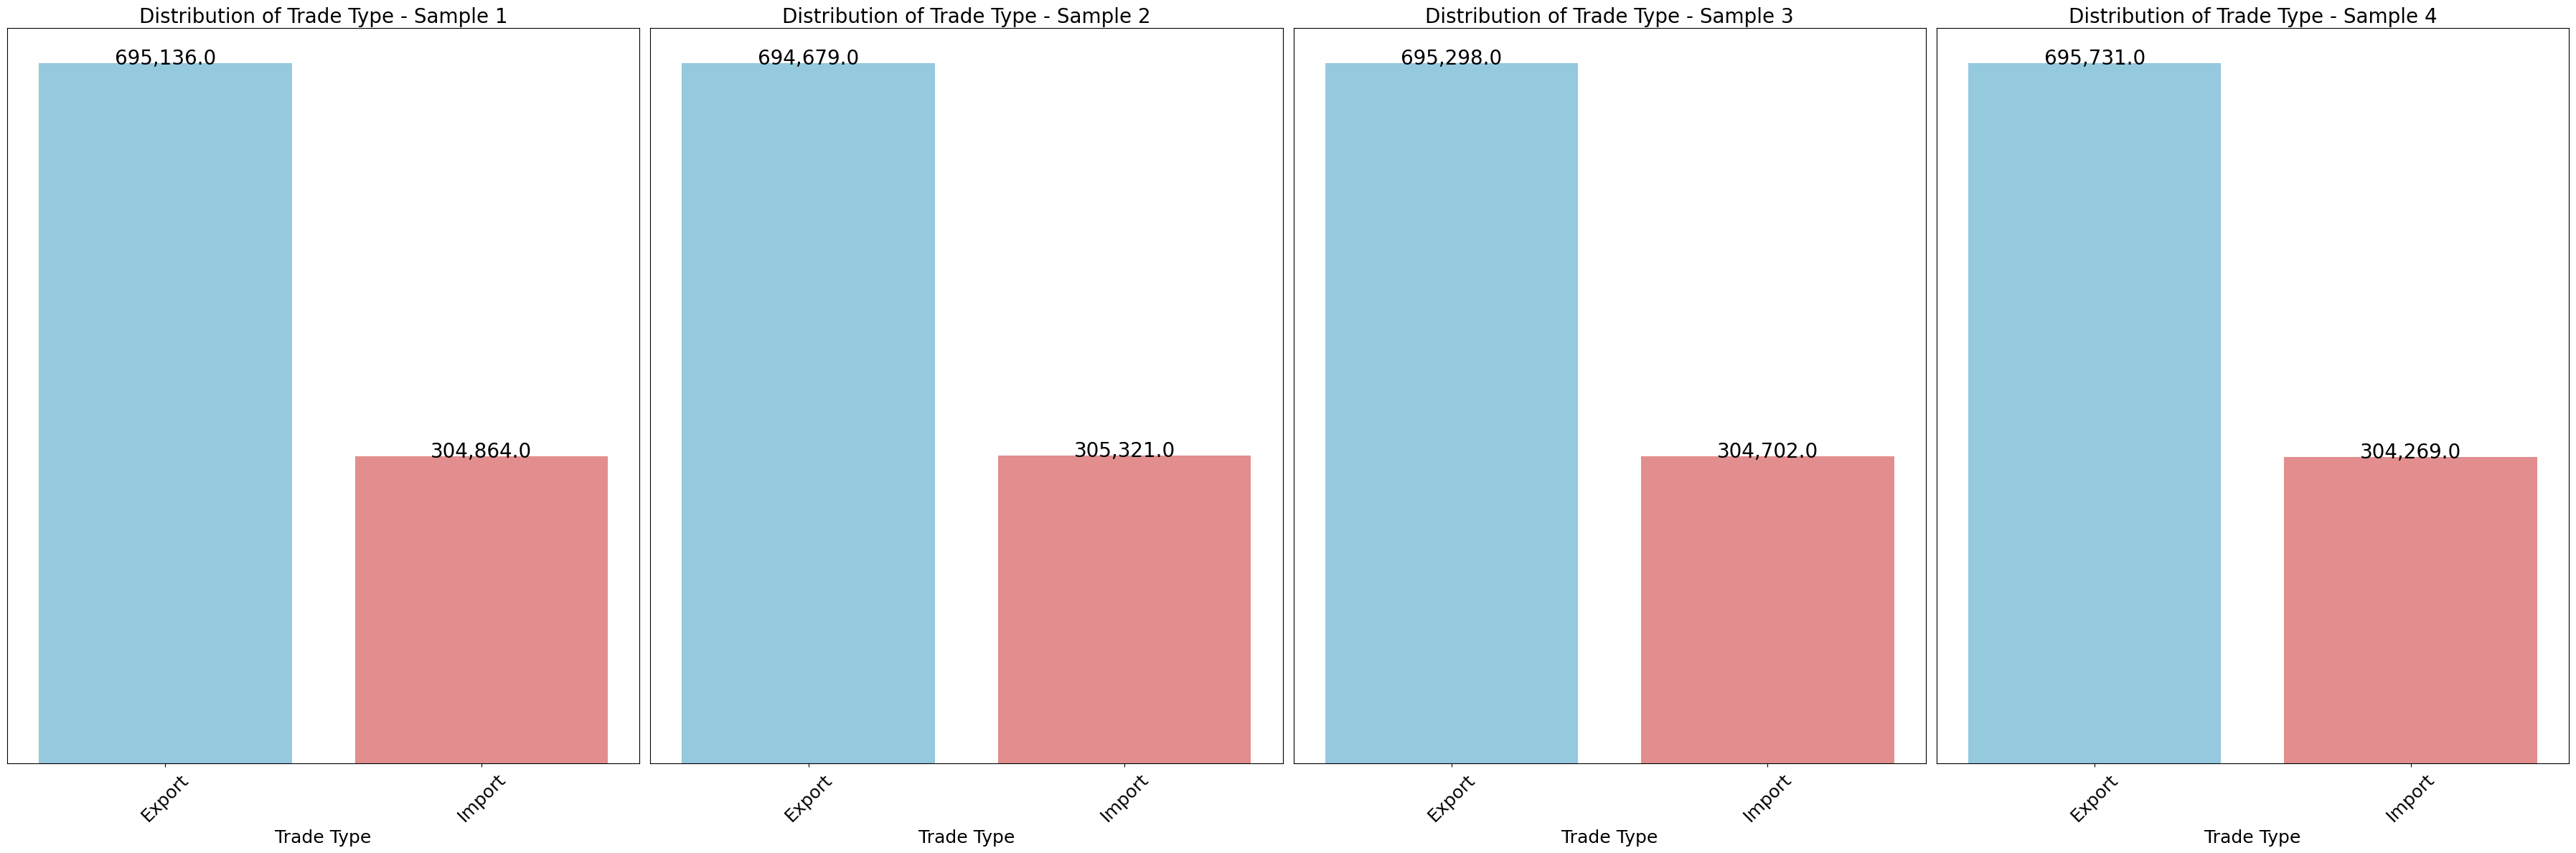

In [50]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Define a custom color palette for 'Export' and 'Import'
custom_palette = {'Export': 'skyblue', 'Import': 'lightcoral'} 

# Define the desired order for the x-axis categories
category_order = ['Export', 'Import'] 

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a count plot
for i, sample_df in enumerate(sampled_dataframes):
    ax = axes[i]

    # Create the count plot for 'trdtype' using the custom palette and specified order
    sns.countplot(x='trdtype', data=sample_df, ax=ax, palette=custom_palette, hue='trdtype', legend=False, order=category_order)

    # Customize plot title and labels
    ax.set_title(f'Distribution of Trade Type - Sample {i+1}', fontsize=20)
    ax.set_xlabel('Trade Type', fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    ax.tick_params(axis='x', rotation=45, labelsize=18) 

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():,}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5), 
            textcoords='offset points',
            fontsize=20
        )


plt.tight_layout() 
plt.show()

From the first plot of the four sampled data I realized that Export was the most used type of trade as compared to Import. The highest count for Export from the four plots was 695,731 as compared to 304,269 for Import.

### 2. Which Country had the most trade activity for the transborder freight? (Check the relation between Country)

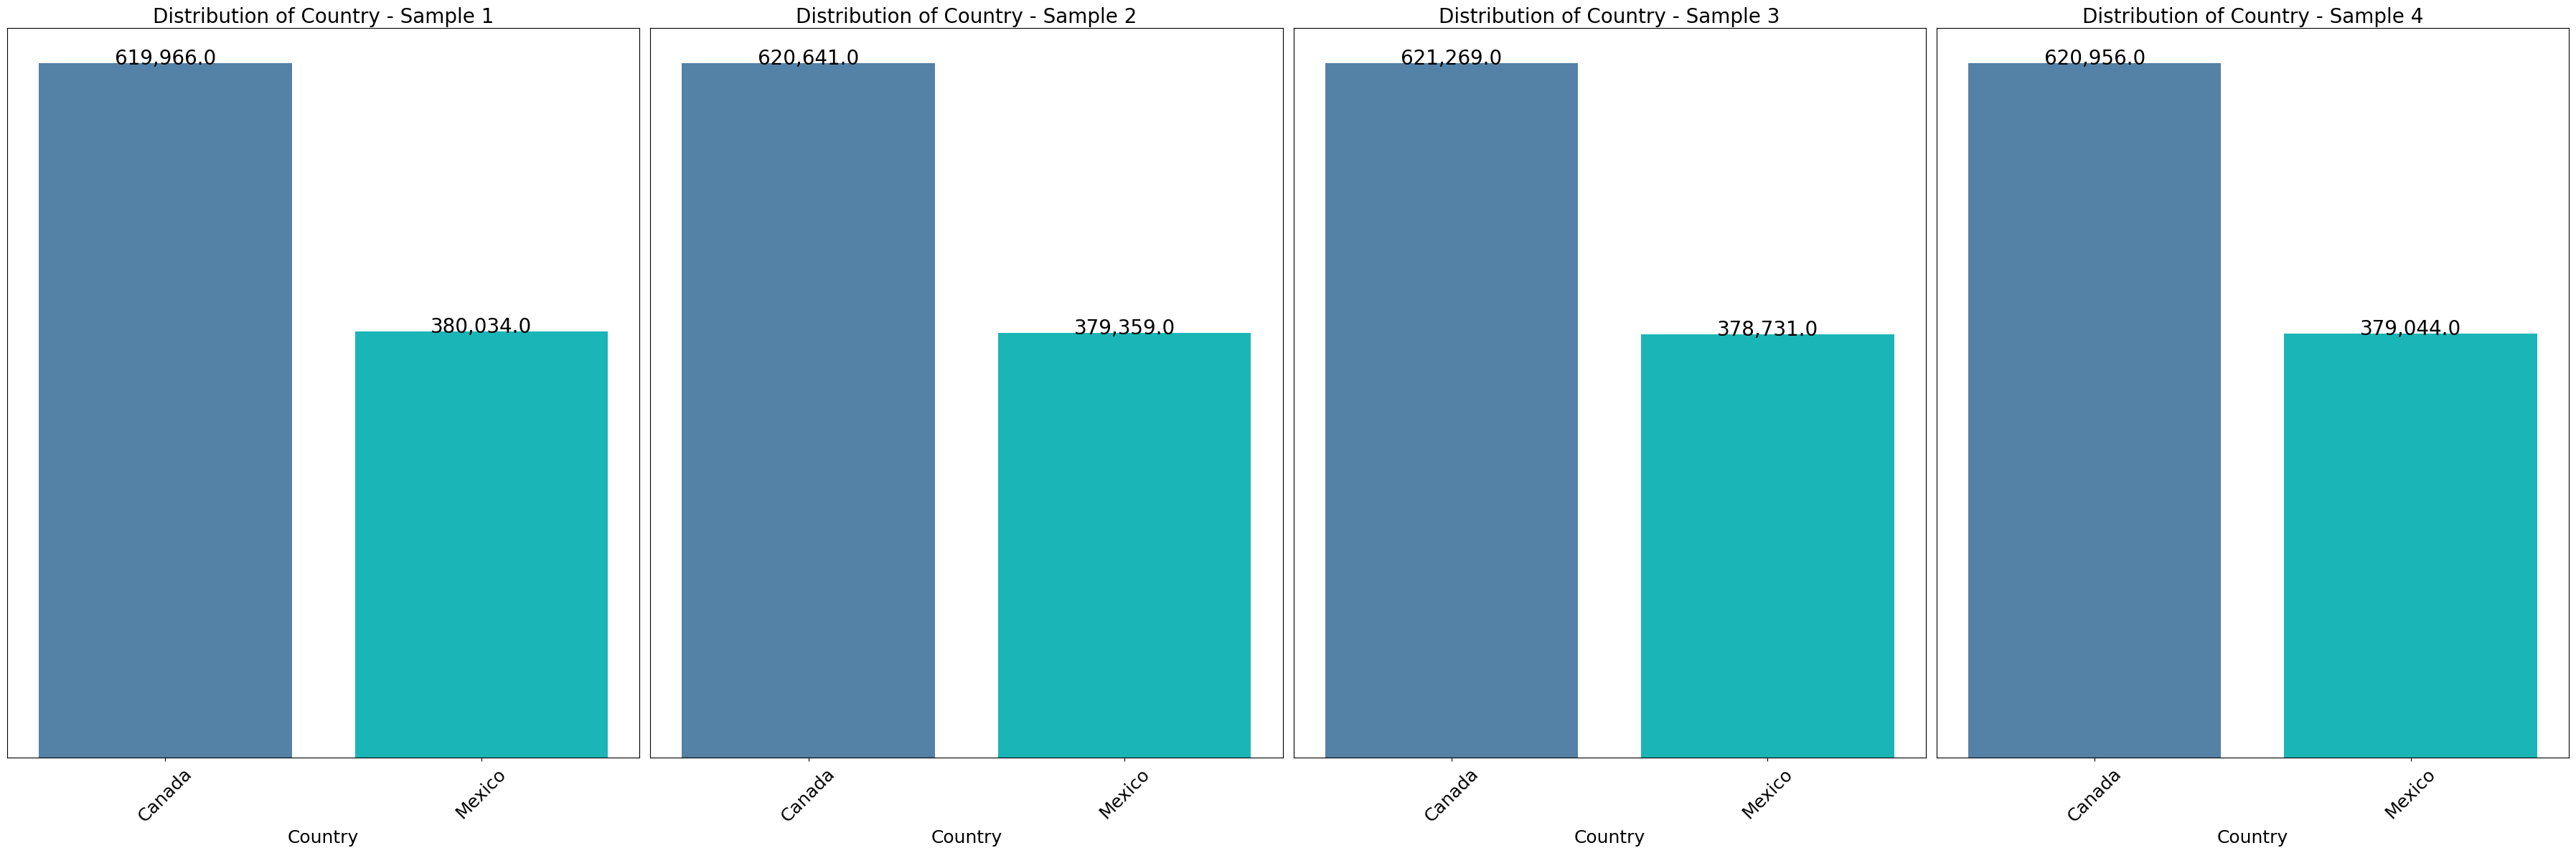

In [51]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Define a custom color palette for 'Canada' and 'Mexico'
custom_palette = {'Canada': 'steelblue', 'Mexico': 'darkturquoise'}

# Define the desired order for the x-axis categories
category_order = ['Canada', 'Mexico']

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a count plot
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Create the count plot for 'country' using the custom palette and specified order
    sns.countplot(x='country', data=sample_df, ax=ax, palette=custom_palette, hue='country', legend=False, order=category_order)

    # Customize plot title and labels
    ax.set_title(f'Distribution of Country - Sample {i+1}', fontsize=20)
    ax.set_xlabel('Country', fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    ax.tick_params(axis='x', rotation=45, labelsize=18)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():,}', 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5), 
            textcoords='offset points',
            fontsize=20
        )


plt.tight_layout() 
plt.show()

From the plot of the four sampled data I realized that the country with the most trade activity was Canada as compared to Mexico. The highest count for Canada from the four plots was 621,269 as compared to 378,731 for Mexico.

### 3. Which merchandise was patronized for the transborder freight trade? (Check distribution of Domestic/Foreign Code)

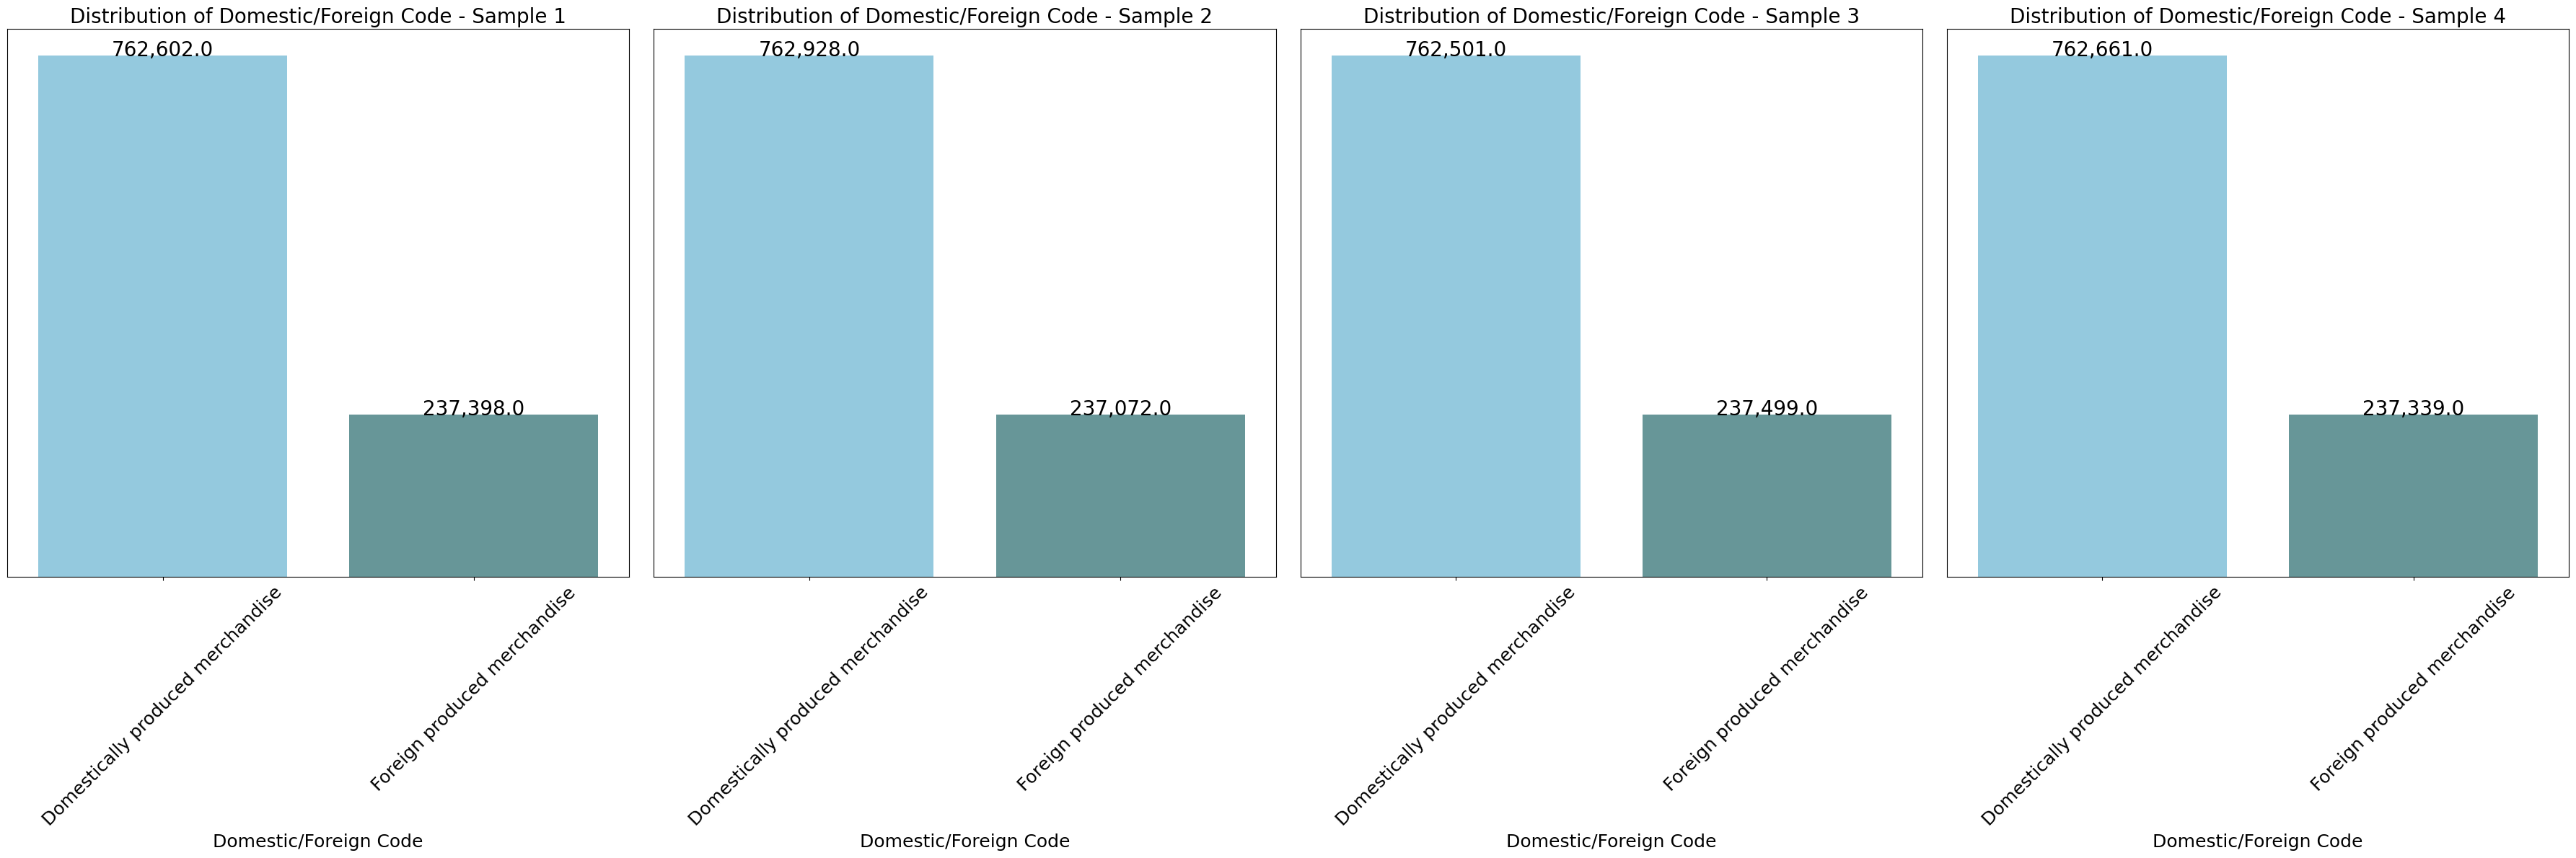

In [52]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Define a custom color palette for 'Domestic' and 'Foreign'
custom_palette = {'Domestically produced merchandise': 'skyblue', 'Foreign produced merchandise': 'cadetblue'}

# Define the desired order for the x-axis categories
category_order = ['Domestically produced merchandise', 'Foreign produced merchandise']

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a count plot
for i, sample_df in enumerate(sampled_dataframes):
    ax = axes[i]

    # Create the count plot for 'country' using the custom palette and specified order
    sns.countplot(x='df', data=sample_df, ax=ax, palette=custom_palette, hue='df', legend=False, order=category_order)

    # Customize plot title and labels
    ax.set_title(f'Distribution of Domestic/Foreign Code - Sample {i+1}', fontsize=20)
    ax.set_xlabel('Domestic/Foreign Code', fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    ax.tick_params(axis='x', rotation=45, labelsize=18)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():,}', 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5), 
            textcoords='offset points',
            fontsize=20
        )


plt.tight_layout() 
plt.show()

From the plot of the four sampled data I realized that the most patronized merchandise for the transborder activity was the Domestically produced merchandise as compared to the Foreign produced merchandise. The highest count for the Domestically produced merchandise from the four plots was 762,928 as compared to 237,072 for the Foreign produced merchandise.

### 4. Which freight packaging method was most used in the transborder freight trade? (Check distribution of Container Code)

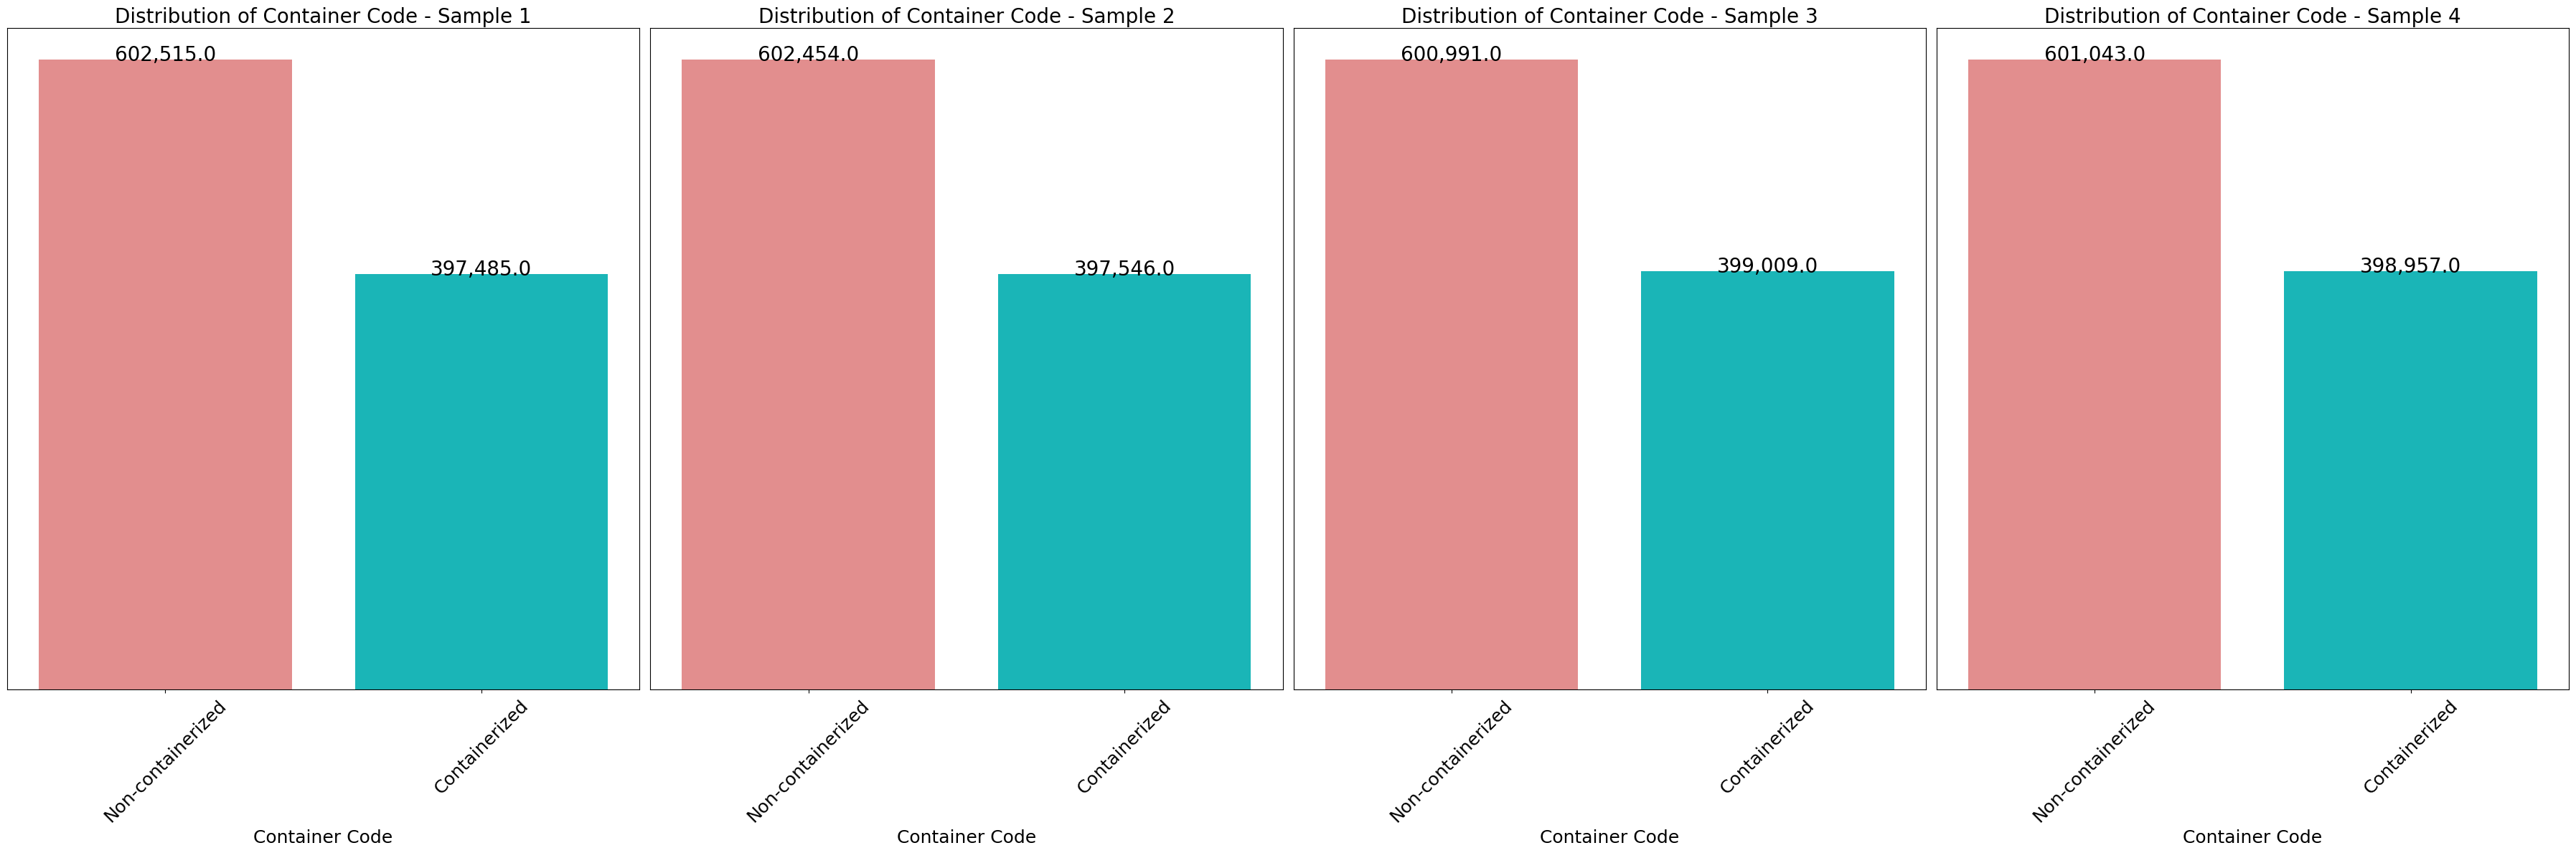

In [53]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Define a custom color palette for 'Non-containerized' and 'Containerized'
custom_palette = {'Non-containerized': 'lightcoral', 'Containerized': 'darkturquoise'}

# Define the desired order for the x-axis categories
category_order = ['Non-containerized', 'Containerized']

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a count plot
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Create the count plot for 'country' using the custom palette and specified order
    sns.countplot(x='contcode', data=sample_df, ax=ax, palette=custom_palette, hue='contcode', legend=False, order=category_order)

    # Customize plot title and labels
    ax.set_title(f'Distribution of Container Code - Sample {i+1}', fontsize=20)
    ax.set_xlabel('Container Code', fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    ax.tick_params(axis='x', rotation=45, labelsize=18)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():,}', # Format the count with commas
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=20
        )


plt.tight_layout() 
plt.show()

From the fourth plot of the four sampled data I realized that the Non-containerized packaging method most patronized packaging method for the transborder activity as compared to the Containerized packaging method. The highest count for the Non-containerized from the four plots was 602,515 as compared to 397,485 for the Containerized.

### 5. What was the most used transportation type used for the transborder freight? (Check the relation between the Transportation Type)¶

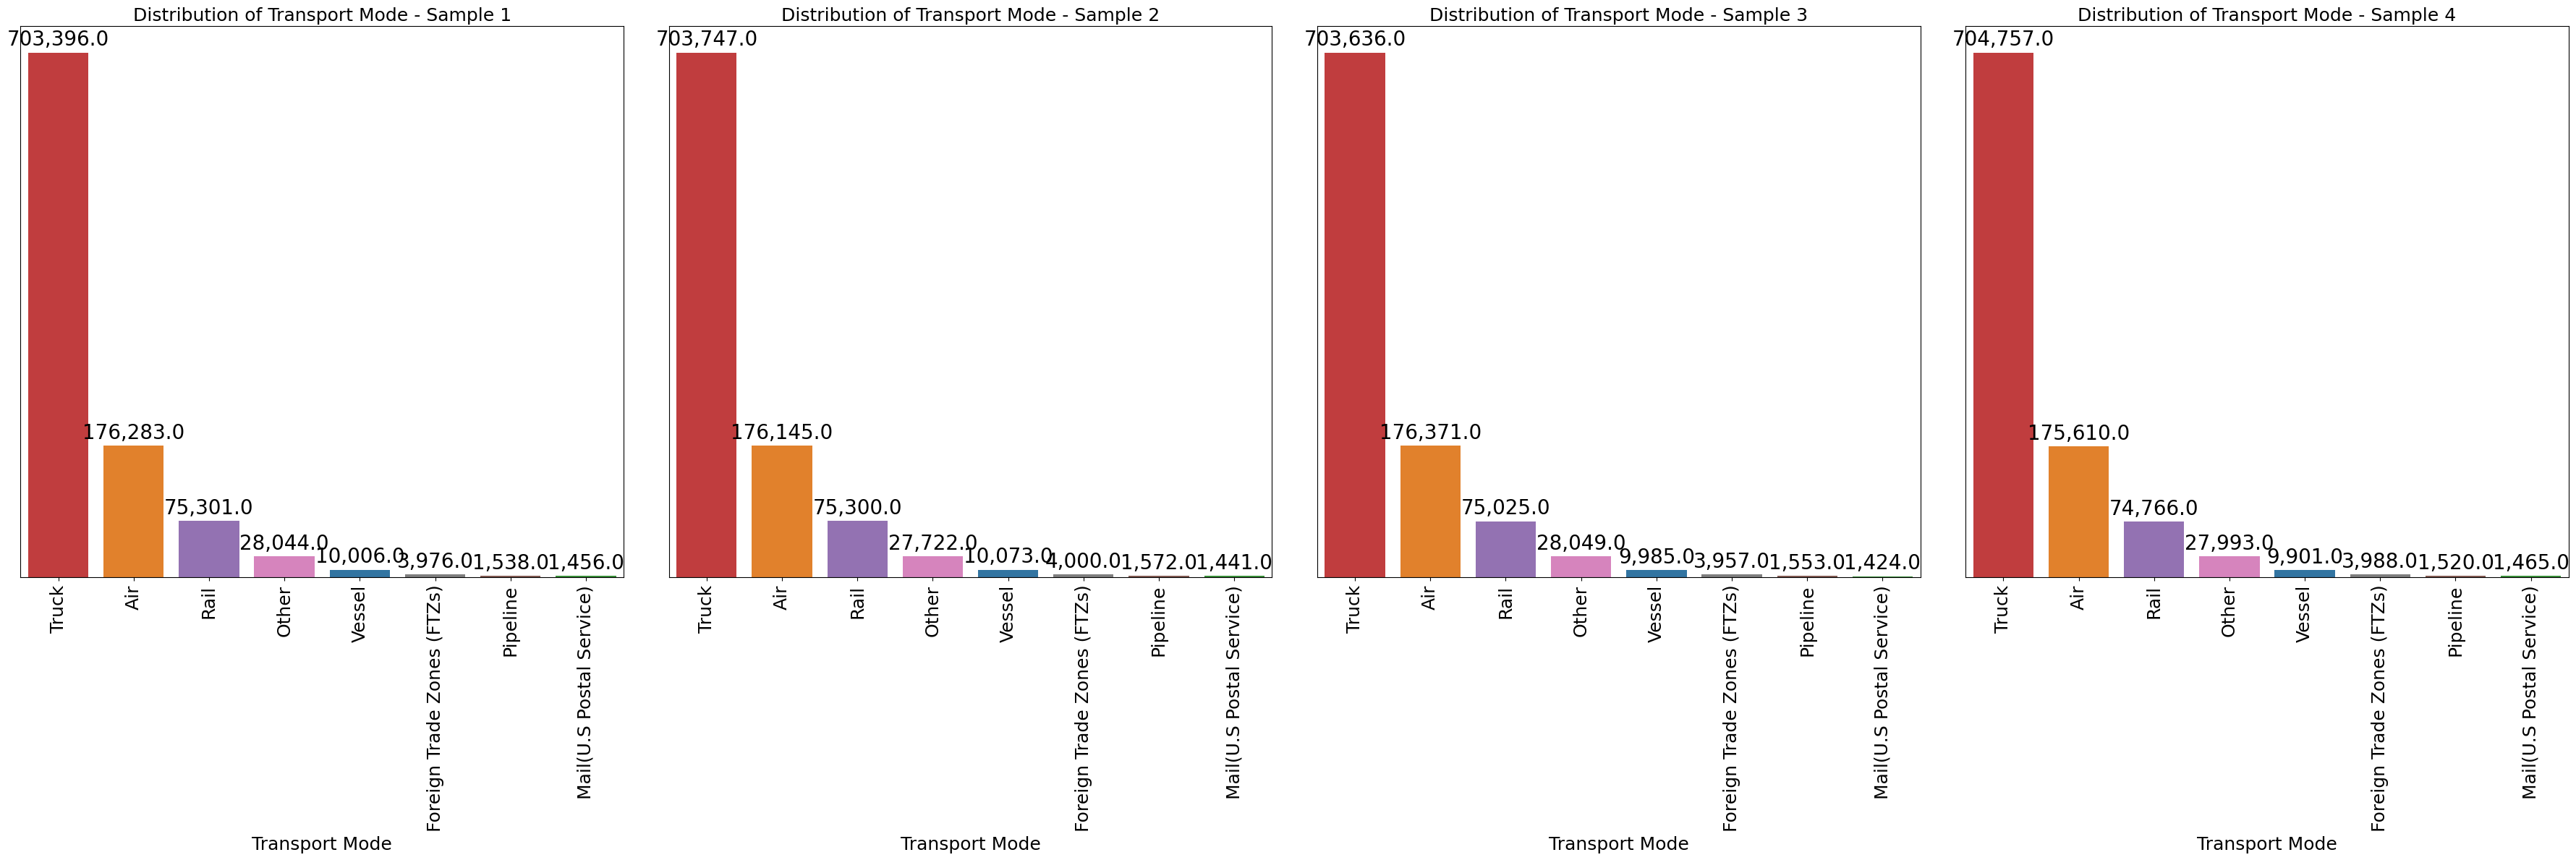

In [54]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Define a custom color palette using a seaborn categorical palette
num_disagmot_categories = sampled_dataframes[0]['disagmot'].nunique()
custom_palette = sns.color_palette("tab10", n_colors=num_disagmot_categories)

# Define the desired order for the x-axis categories based on frequency in the first sample
category_order = sampled_dataframes[0]['disagmot'].value_counts().index.tolist()

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a count plot
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Create the count plot for 'disagmot' using the custom palette and specified order
    sns.countplot(x='disagmot', data=sample_df, ax=ax, palette=custom_palette, hue='disagmot', legend=False, order=category_order)

    # Customize plot title and labels
    ax.set_title(f'Distribution of Transport Mode - Sample {i+1}', fontsize=18)
    ax.set_xlabel('Transport Mode', fontsize=18) 
    ax.set_ylabel('Count', fontsize=18) 
    ax.tick_params(axis='x', rotation=90, labelsize=18) 
    ax.tick_params(axis='y' , labelsize=18)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():,}', # Format the count with commas
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            xytext=(0, 3), 
            textcoords='offset points',
            fontsize=20 
        )

plt.tight_layout() 
plt.show()

From the plot of the four sampled data I realized that Trucks were the most used transportation type. This was followed by Air and Rail transport. The least favored type of transport was via Mail (U.S Postal Service). The highest count for the Trucks from the four plots was 704,757 as compared to 465 for Mail (U.S Postal Service).

# Bivarite Visualization

For the bivariate visualization, I investigated the relationships between pairs of variables in my data.

### 6. What was the mode of transportation that was used for the various trade type?

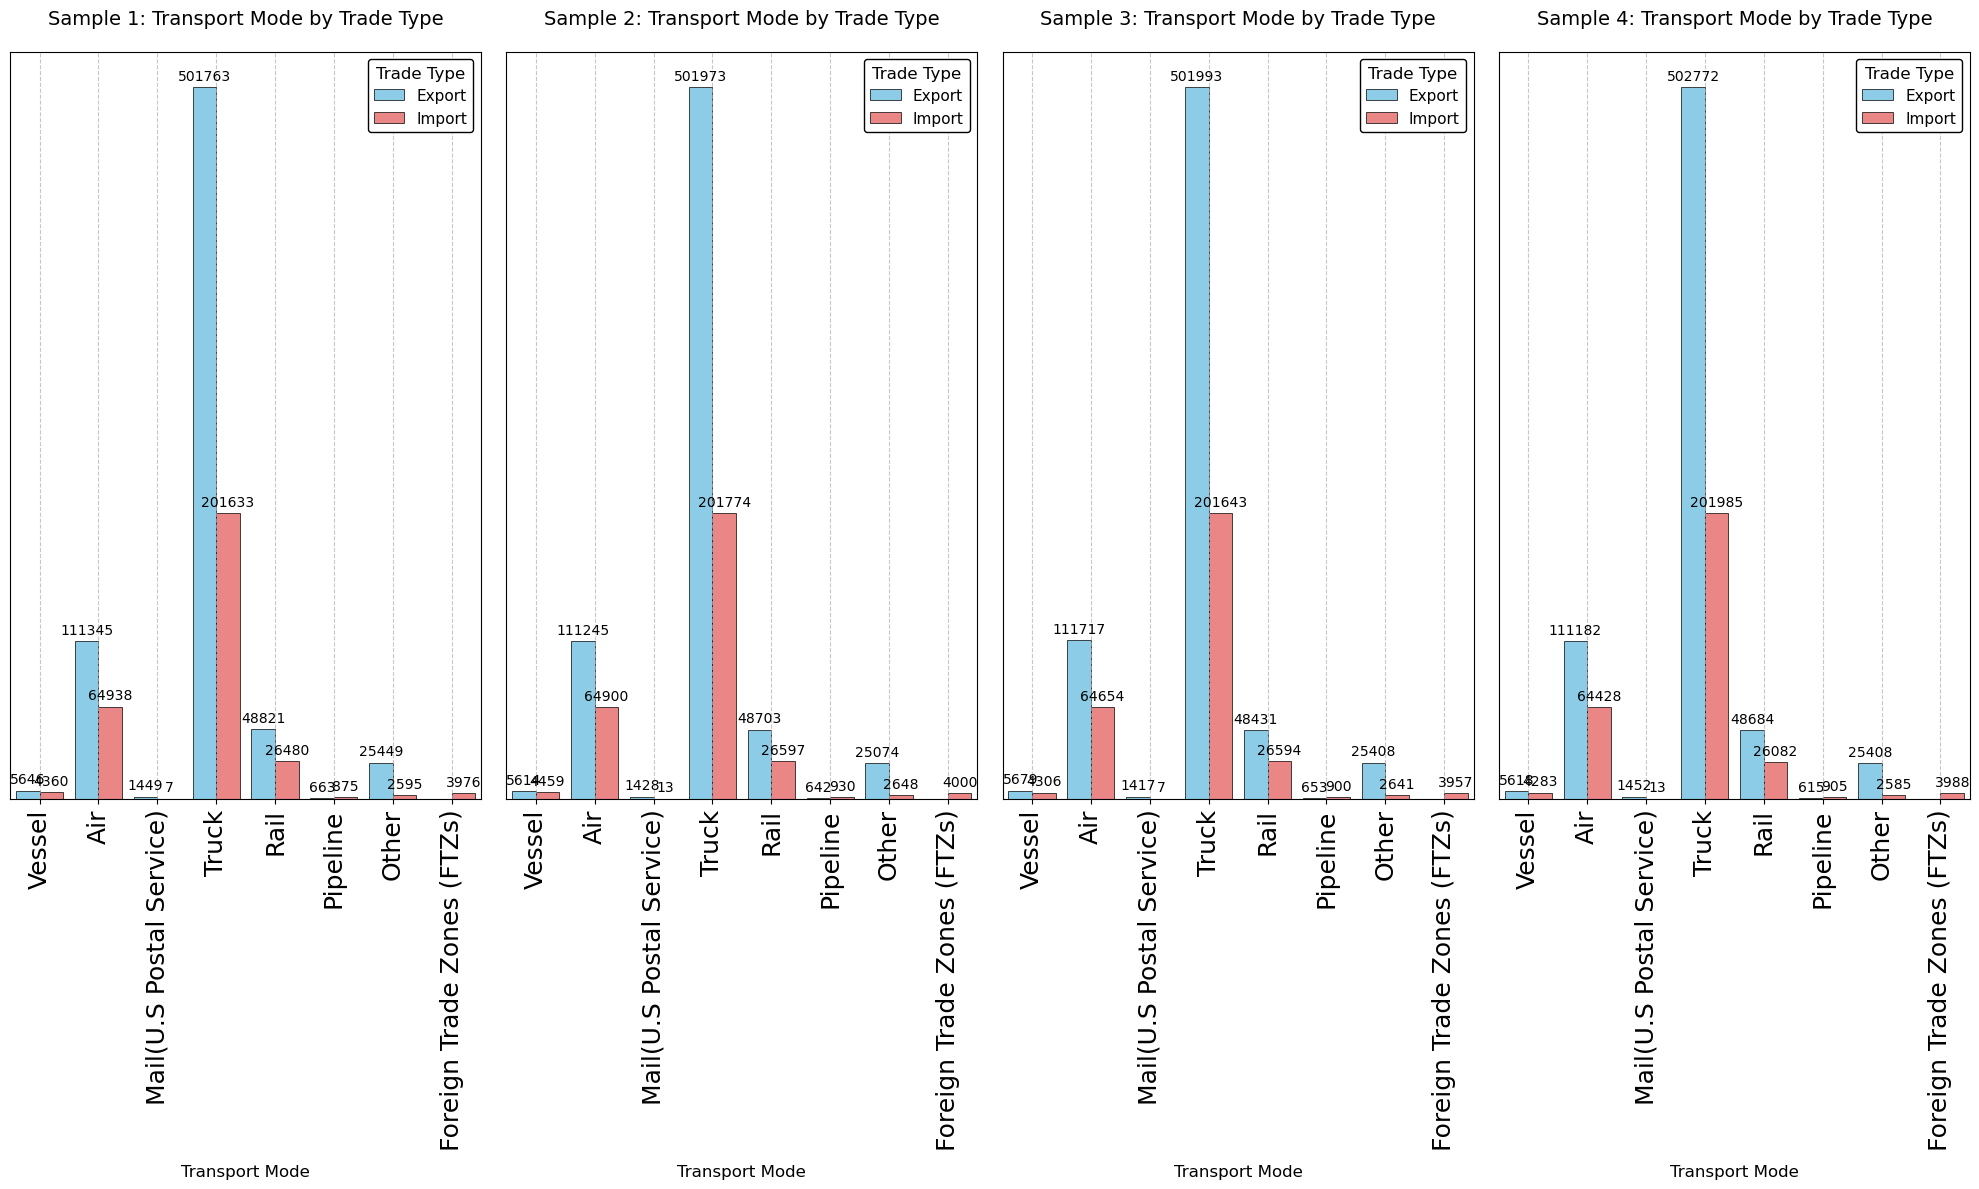

In [56]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, num_samples,
                        figsize=(min(20, 8 * num_samples), 12),  # Dynamic width
                        squeeze=False)  # Always return 2D array of axes
axes = axes.flatten()  # Flatten to 1D array for easier iteration

# Define a custom color palette for 'Export' and 'Import'
custom_palette = {'Export': 'skyblue', 'Import': 'lightcoral'} 

# Define the desired order for the hue categories
hue_order = ['Export', 'Import'] 


for i, sample_df in enumerate(sampled_dataframes):
    ax = axes[i]

    # Create plot with enhanced parameters
    sns.countplot(
        x="disagmot",
        hue="trdtype",
        data=sample_df,
        ax=ax,
        palette=custom_palette, # Used the custom palette
        hue_order=hue_order,   # Set the order for hue
        edgecolor='black',  # Added borders to bars
        linewidth=0.5,      # Border thickness
        saturation=0.9      # Slightly desaturated colors
    )

    # Title and labels with larger fonts
    ax.set_title(
        f'Sample {i+1}: Transport Mode by Trade Type',
        fontsize=14,
        pad=20
    )
    ax.set_xlabel('Transport Mode', fontsize=12, labelpad=10)
    ax.set_ylabel('Count', fontsize=12, labelpad=10)

    # Rotated x-ticks with larger font
    ax.tick_params(axis='x', rotation=90, labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

    # Grid customization
    ax.grid(True, linestyle='--', alpha=0.7)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Legend with larger font and title
    legend = ax.legend(
        title='Trade Type',
        title_fontsize=12,
        fontsize=11,
        frameon=True,
        framealpha=1,
        edgecolor='black'
    )

    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container,
                    label_type='edge',
                    padding=3,
                    fontsize=10,
                    fmt='%d')

# Adjust spacing between subplots
plt.tight_layout() 

# Show the plot
plt.show()

From the plot of the four sampled data I realized that for almost all the transportation type used they were used for mainly Exports as compared to the number of Imports done with the transportation type. The only exception was with the Foreign Trade Zones(FTZs) that was only used for Import and no Export.

I also realized that the use of Trucks was still the most used transportation type and they were also used for mainly Exports. This was followed by Air and Rail transport. The least favored type of transport was via Mail (U.S Postal Service). The highest count for the Trucks from the four plots was 502,772 for Export as compared to 201,985 for Import.

### 7.What was the top 10 most patronized commodities that was transported by the various transportation mode?

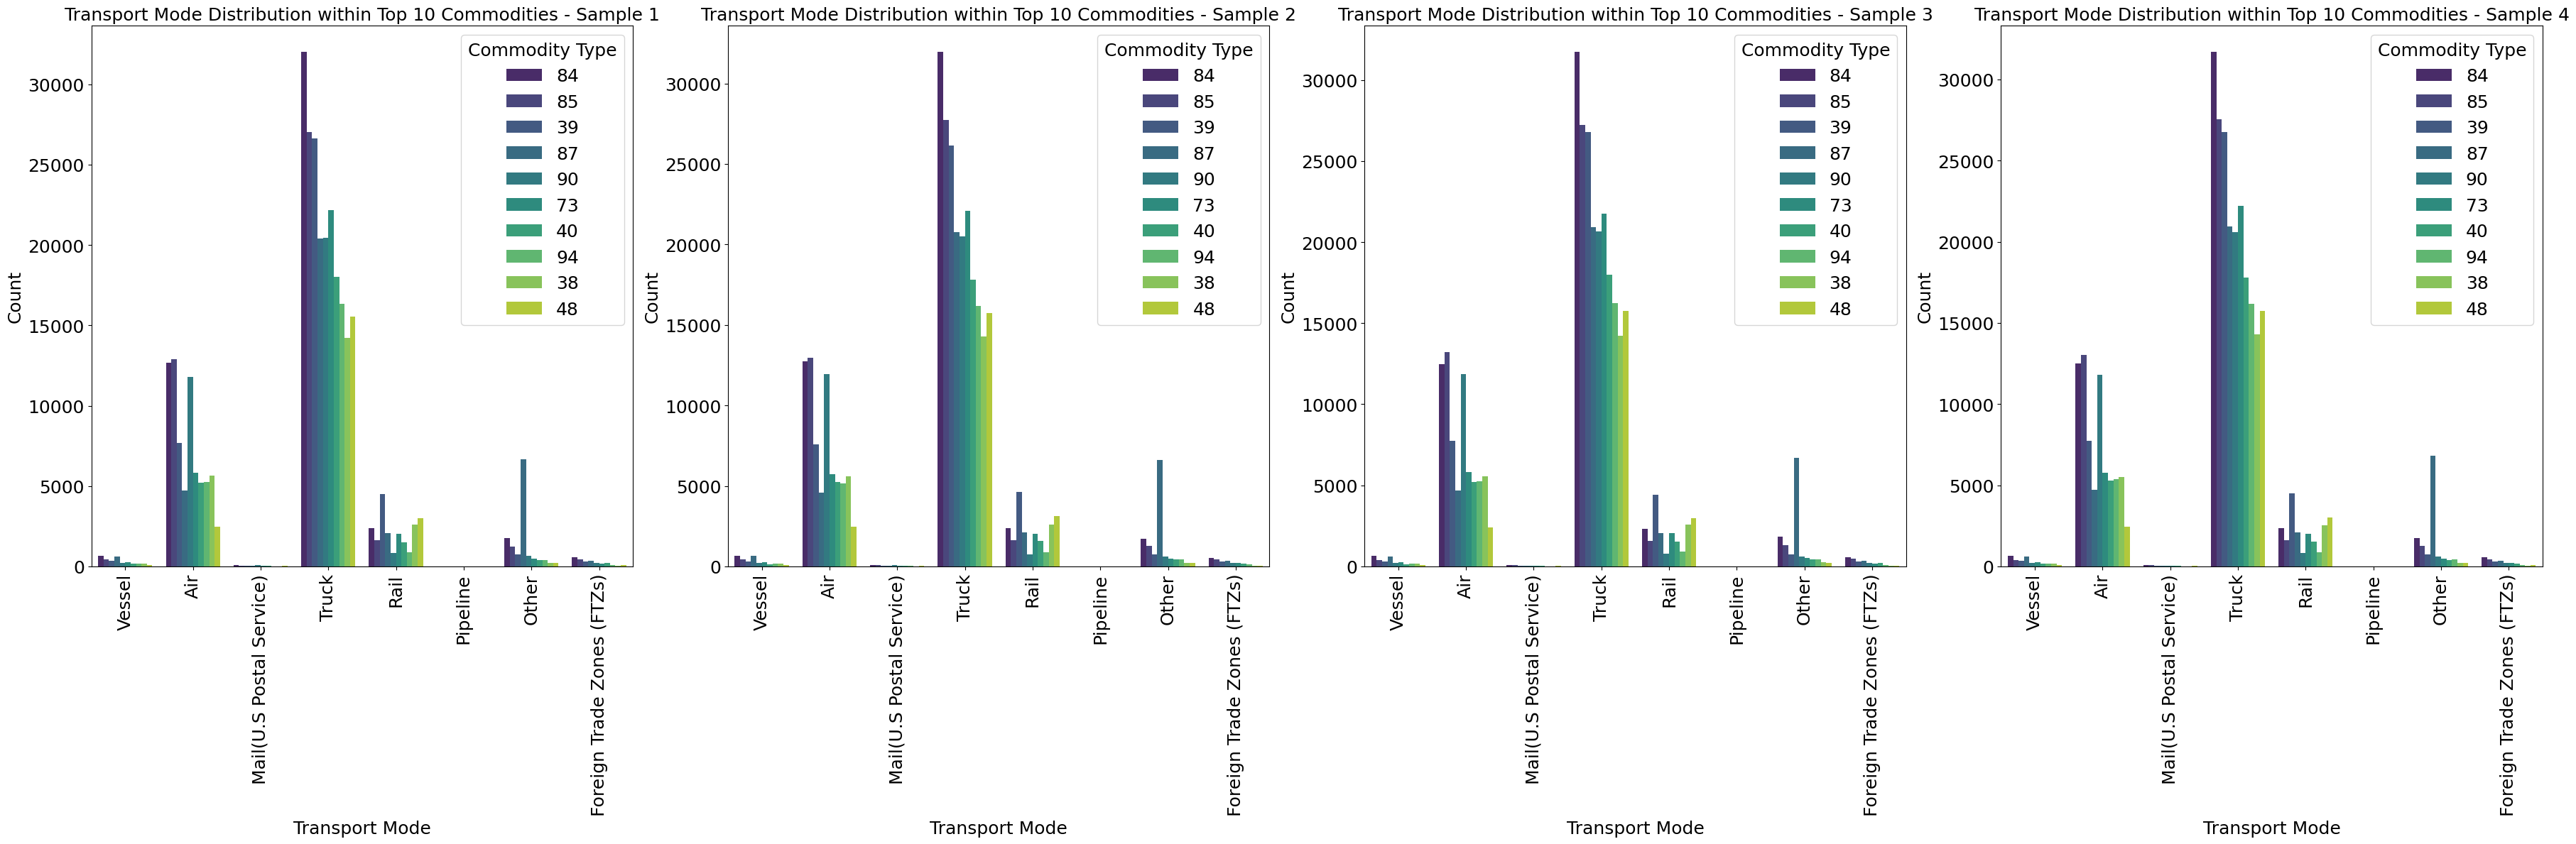

In [57]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a grouped bar chart
for i, sample_df in enumerate(sampled_dataframes):
    ax = axes[i]

    # Get the top 10 commodities by frequency in the current sample
    top_10_commodities = sample_df['commodity'].value_counts().nlargest(10).index.tolist()

    # Filter the DataFrame to include only the top 10 commodities
    filtered_df = sample_df[sample_df['commodity'].isin(top_10_commodities)].copy() 


    # Create the grouped bar chart for disagmot against the top 10 commodity2
    # Use commodity2 as hue to see distribution within each disagmot
    sns.countplot(x="disagmot", hue="commodity", data=filtered_df, ax=ax, palette="viridis", hue_order=top_10_commodities) 

    # Customize plot title and labels
    ax.set_title(f'Transport Mode Distribution within Top 10 Commodities - Sample {i+1}', fontsize=18) 
    ax.set_xlabel('Transport Mode', fontsize=18) 
    ax.set_ylabel('Count', fontsize=18) 
    ax.tick_params(axis='x', rotation=90, labelsize=18) 
    ax.tick_params(axis='y', labelsize=18) 

    # Add a legend for the commodities
    ax.legend(title='Commodity Type', fontsize=18, title_fontsize=18)


plt.tight_layout() 
plt.show()

The top 10 commodities that were transported by trucks are listed below;

(1). 84 - Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof

(2). 85 - Electrical machinery and equipment and parts thereof; Sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles

(3). 39 - Plastics and articles thereof

(4). 87 - Vehicles, other than railway or tramway rolling stock, and parts and accessories thereof

(5). 90 - Optical, photographic, cinematographic, measuring, checking, precision, medical or surgical instruments and apparatus; Parts and accessories thereof

(6). 73 - Articles of iron or steel

(7). 40 - Rubber and articles thereof

(8). 94 - Furniture; Bedding, mattress supports, cushions and similar stuffed furnishings; Lamps and lighting fittings, not elsewhere specified or included; Illuminated signs, illuminated nameplates and the like; Prefabricated buildings

(9). 38 - Miscellaneous chemical products

(10). 48 - Paper and paperboard; Articles of paper pulp, of paper or of paperboard

### 8. Are there any yearly seasonal patterns in the freight costs?

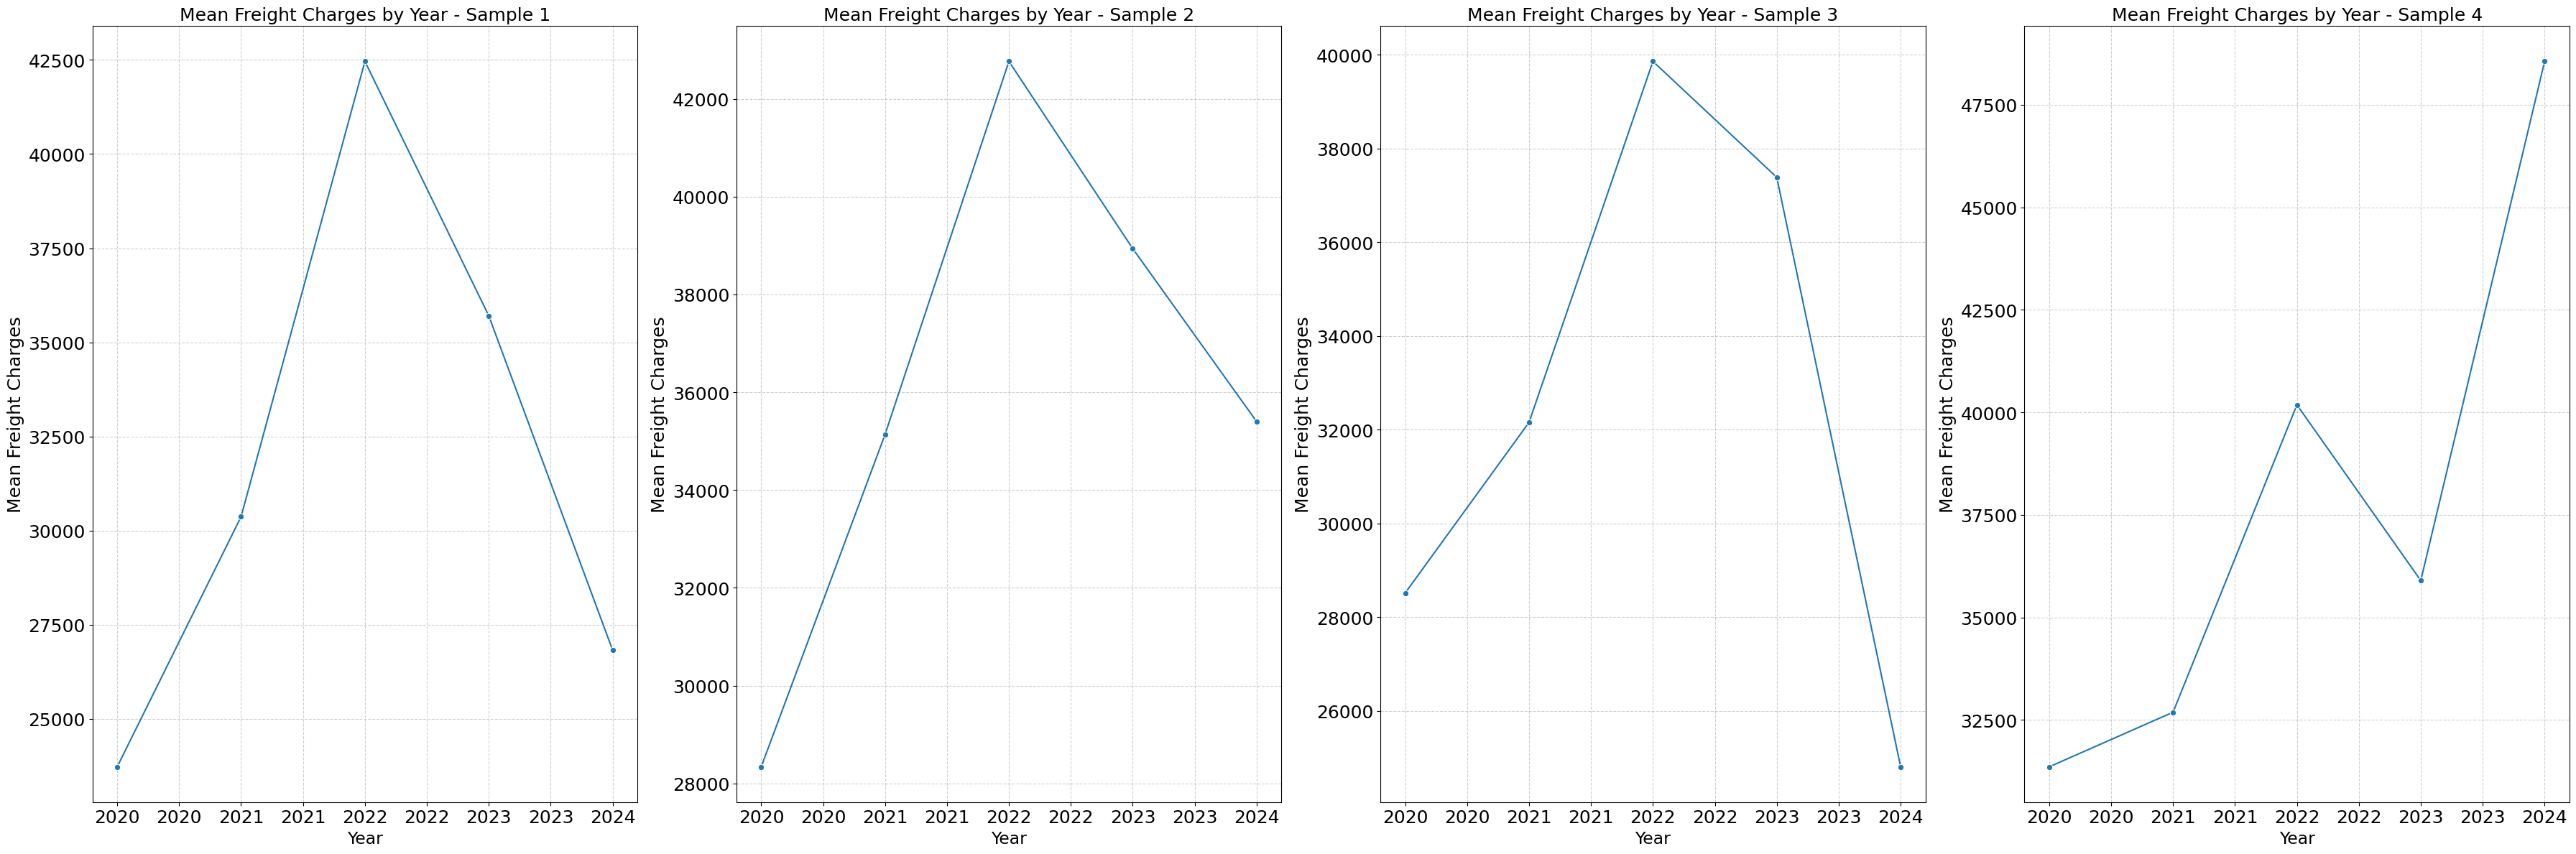

In [58]:
import matplotlib.ticker as mticker # Import mticker for formatting

# Define the number of samples
num_samples = len(sampled_dataframes)

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 
# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a line plot
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Group by year and calculate the mean freight charges
    freight_by_year = sample_df.groupby('year')['freight_charges'].mean().reset_index()

    # Create a line plot
    sns.lineplot(x='year', y='freight_charges', data=freight_by_year, ax=ax, marker='o') 

    # Customize plot title and labels
    ax.set_title(f'Mean Freight Charges by Year - Sample {i+1}', fontsize=18) 
    ax.set_xlabel('Year', fontsize=17)
    ax.set_ylabel('Mean Freight Charges', fontsize=18) 
    ax.tick_params(axis='x', labelsize=18) 
    ax.tick_params(axis='y', labelsize=18) 

    # Format x-axis labels as integers
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))


    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout() 
plt.show()

From the line plot of the four sampled data I realized that the general trend for Sample 1, 2 and 3 was that the mean freight charges increases from 2020, then hits a peak mean freight charge in 2022 and then drops from 2023 and then further drops in 2024 with the exception of the fourth sampled plot. For the fourth sampled plot I observed that the Mean Freight Charges increased from 2020 to 2021 and then increased again from 2021 to 2022 but did not hit a peak in that year as compared to the other 3 sampled plots. From 2022 the charges dropped in 2023 but then the charge for that sample defied the norm of further dropping in 2024 to rising to its peak.

The 3rd sample plot also had a deviation from the because it was the only incident where the mean freight charge for 2024 was lower than the starting mean freight charge for 2020.

This is a clear indication that the freight charges need to be reviewed to assure the business makes profit.

### 9. Does the freight cost correlate with the ship weight

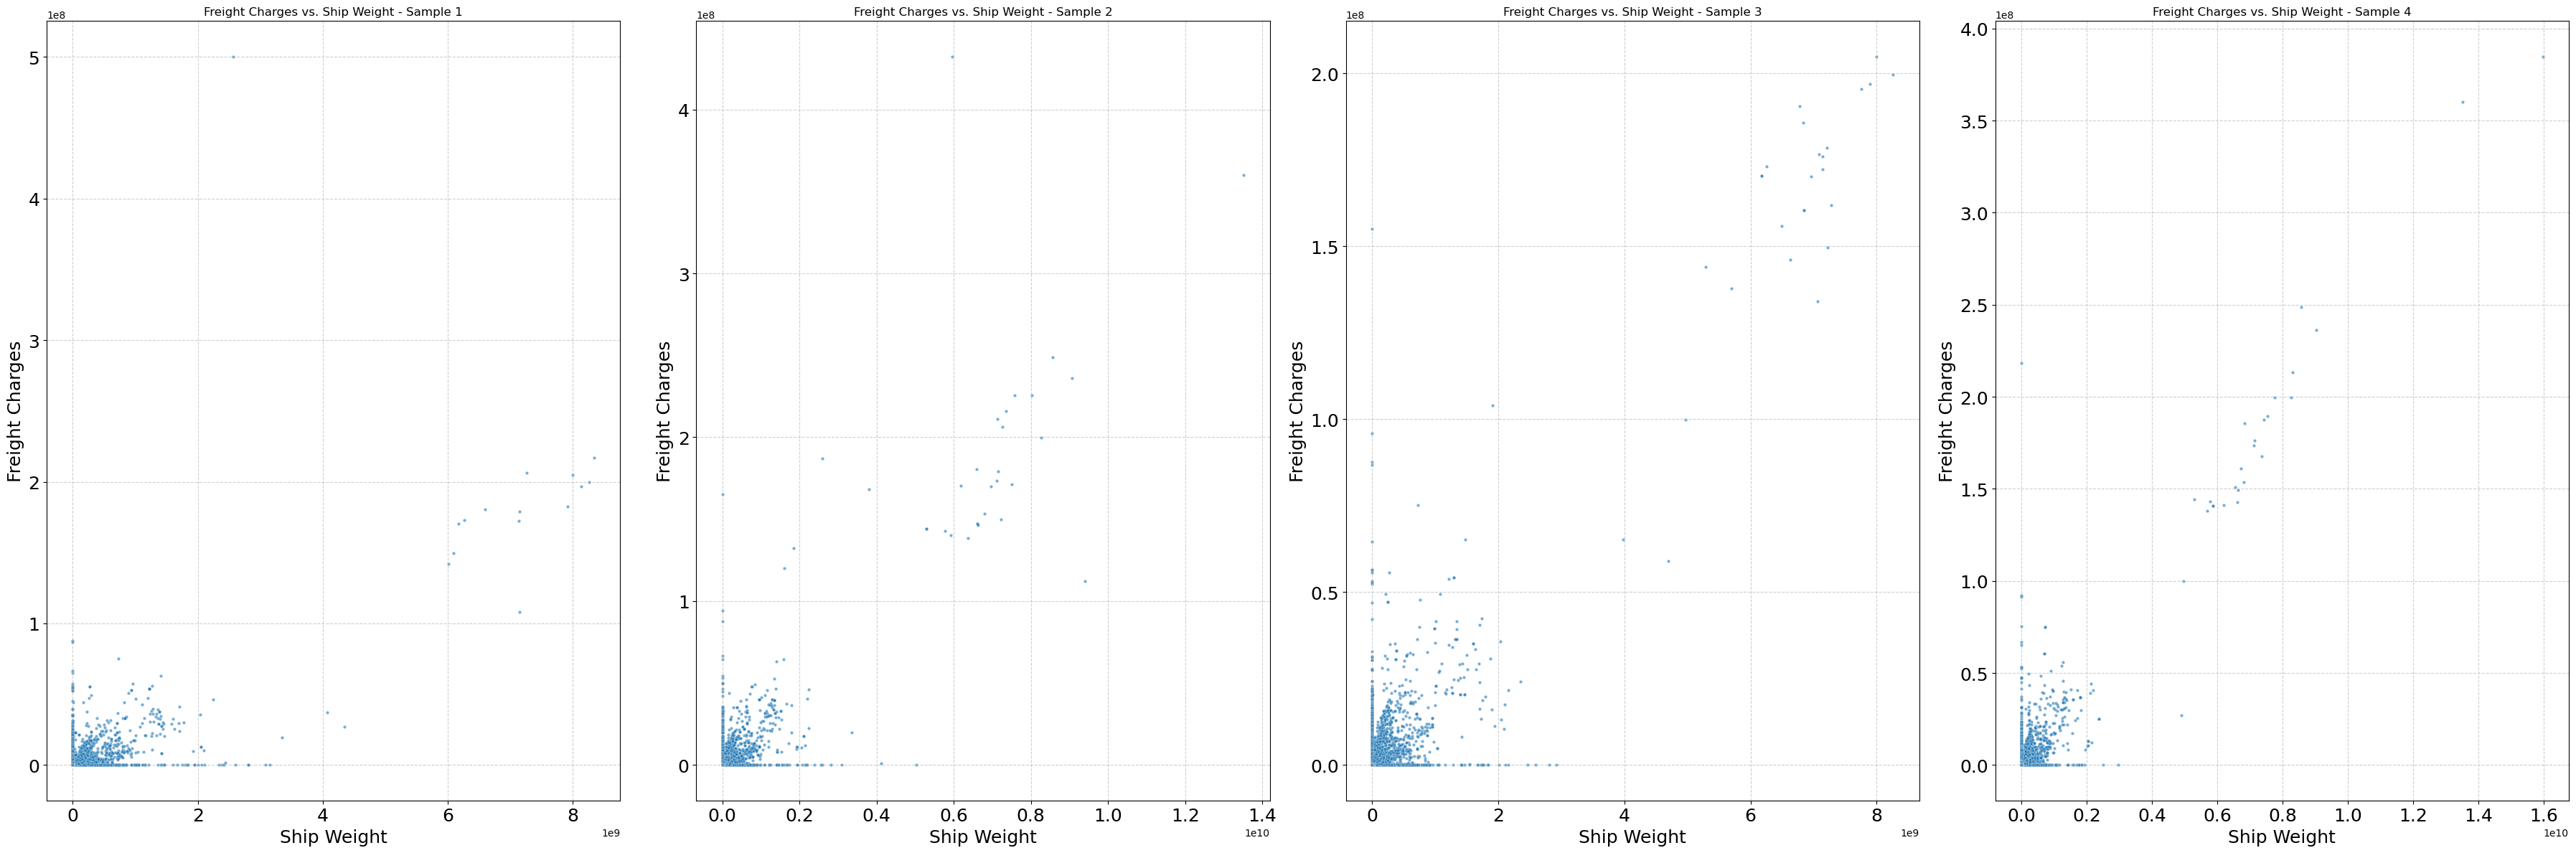

In [59]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a scatter plot
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Create a scatter plot for freight_charges against ship_weight
    sns.scatterplot(x='shipwt', y='freight_charges', data=sample_df, ax=ax, alpha=0.6, s=10)
    # Customize plot title and labels
    ax.set_title(f'Freight Charges vs. Ship Weight - Sample {i+1}')
    ax.set_xlabel('Ship Weight', fontsize=18)
    ax.set_ylabel('Freight Charges', fontsize=18)
    ax.tick_params(axis='x', labelsize=18) 
    ax.tick_params(axis='y', labelsize=18)

    # Add some grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

From the scatter plot of the four sampled data I realized that most of the points were mostly clustered quite close to the origin which could mean that there may be a weak correlation between the freight charges and the ship weight which means it has to be studied further.

### 10. Does freight costs correlate with ship weight and value?

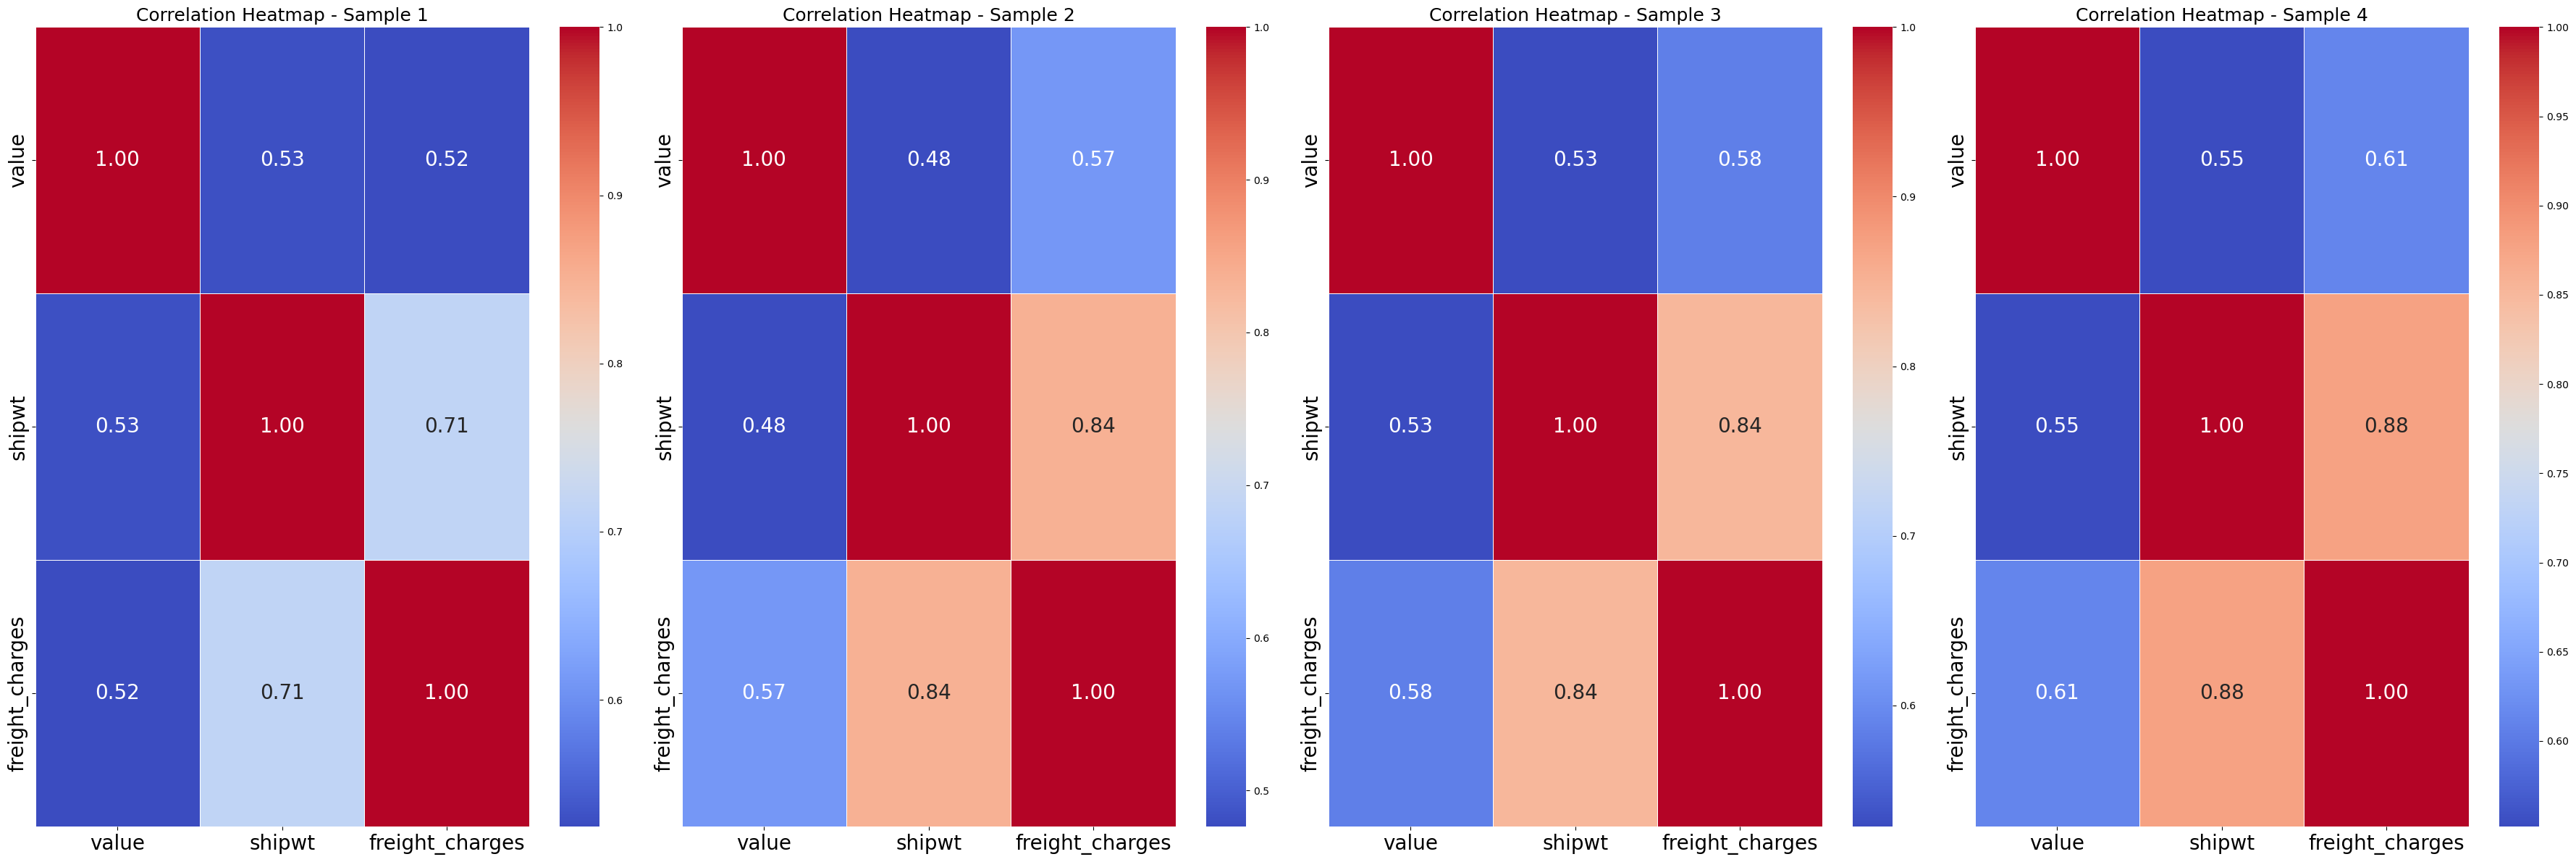

In [60]:
# Select the relevant numerical columns for correlation
correlation_columns = ['value', 'shipwt', 'freight_charges']

# Define the number of samples
num_samples = len(sampled_dataframes)

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Iterate through each sampled DataFrame and create a heatmap
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Calculate the correlation matrix for the current sample
    # Ensure the selected columns exist and are numeric in the sample
    try:
        correlation_matrix = sample_df[correlation_columns].corr()

        # Create the heatmap
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax, annot_kws={'size': 20})

        # Customize the plot
        ax.set_title(f'Correlation Heatmap - Sample {i+1}', fontsize=18)
        ax.tick_params(axis='x', labelsize=20) 
        ax.tick_params(axis='y', labelsize=20) 

    except KeyError as e:
        print(f"Error in Sample {i+1}: One or more of the specified columns not found in the DataFrame: {e}")
        # Optionally, add text to the subplot indicating the error
        ax.text(0.5, 0.5, 'Error: Columns not found', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red', fontsize=14)
    except Exception as e:
        print(f"An error occurred in Sample {i+1}: {e}")
        # Add text to the subplot indicating the error
        ax.text(0.5, 0.5, f'An error occurred:\n{e}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red', fontsize=14)


plt.tight_layout() 
plt.show()

From the Correlation heatmap plot of the four sampled data I realized that there is a strong positive correlation between ship weight and freight charges with a moderate positive between the ship weight and value and also a moderate positive correlation between freight charges and value.

### 11. What was the trade type utilized by the two countries?

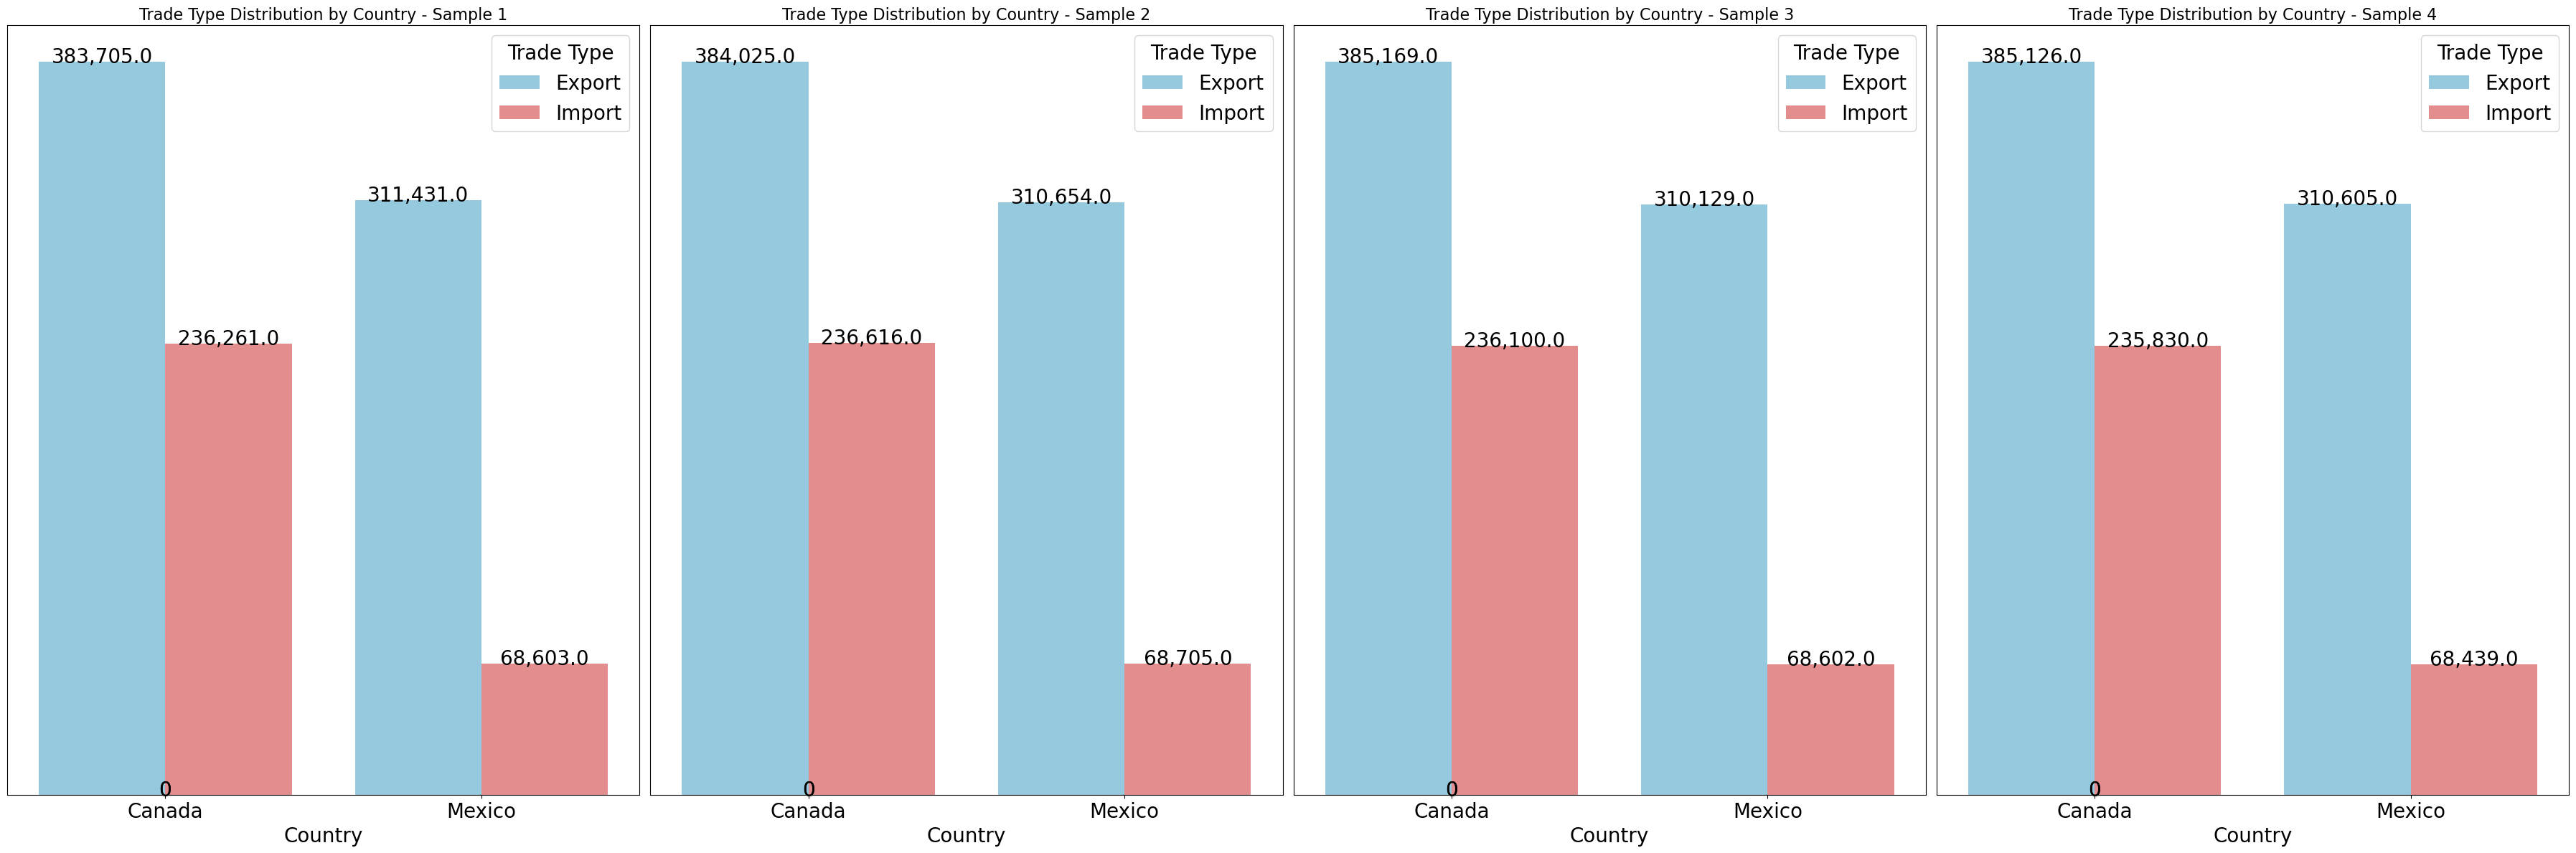

In [61]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Set up the matplotlib figure and axes for side-by-side plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12)) 

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Define a custom color palette for 'Canada' and 'Mexico'
country_palette = {'Canada': 'steelblue', 'Mexico': 'darkturquoise'}

# Define a custom color palette for 'Export' and 'Import'
trdtype_palette = {'Export': 'skyblue', 'Import': 'lightcoral'}


# Define the order for countries on the x-axis
country_order = ['Canada', 'Mexico']

# Define the order for trade types in the hue
trdtype_order = ['Export', 'Import']


# Iterate through each sampled DataFrame and create a count plot
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Create the grouped bar chart for trdtype against country
    sns.countplot(x='country', hue='trdtype', data=sample_df, ax=ax, palette=trdtype_palette, order=country_order, hue_order=trdtype_order) 


    # Customize plot title and labels
    ax.set_title(f'Trade Type Distribution by Country - Sample {i+1}', fontsize=16)
    ax.set_xlabel('Country', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(axis='x', rotation=0, labelsize=20) 
    ax.tick_params(axis='y', labelsize=20)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():,}', # Format the count with commas
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=20
        )

    # Add a legend
    ax.legend(title='Trade Type', title_fontsize=20, fontsize=20)


plt.tight_layout() 
plt.show()

From the plot of the four sampled data I realized that for the two countries the most used trade type was Exports as compared to the number of Imports done by the two countries. The highest count for Canada from the four plots was 385,169 for Export as compared to 236,100 for Import. The highest count for Mexico from the four plots was 311,431 for Export as compared to 68,603 for Import.

# Multivarite Visualization

### 12. How were the goods packaged for the various trade types that were utilized by the two countries?

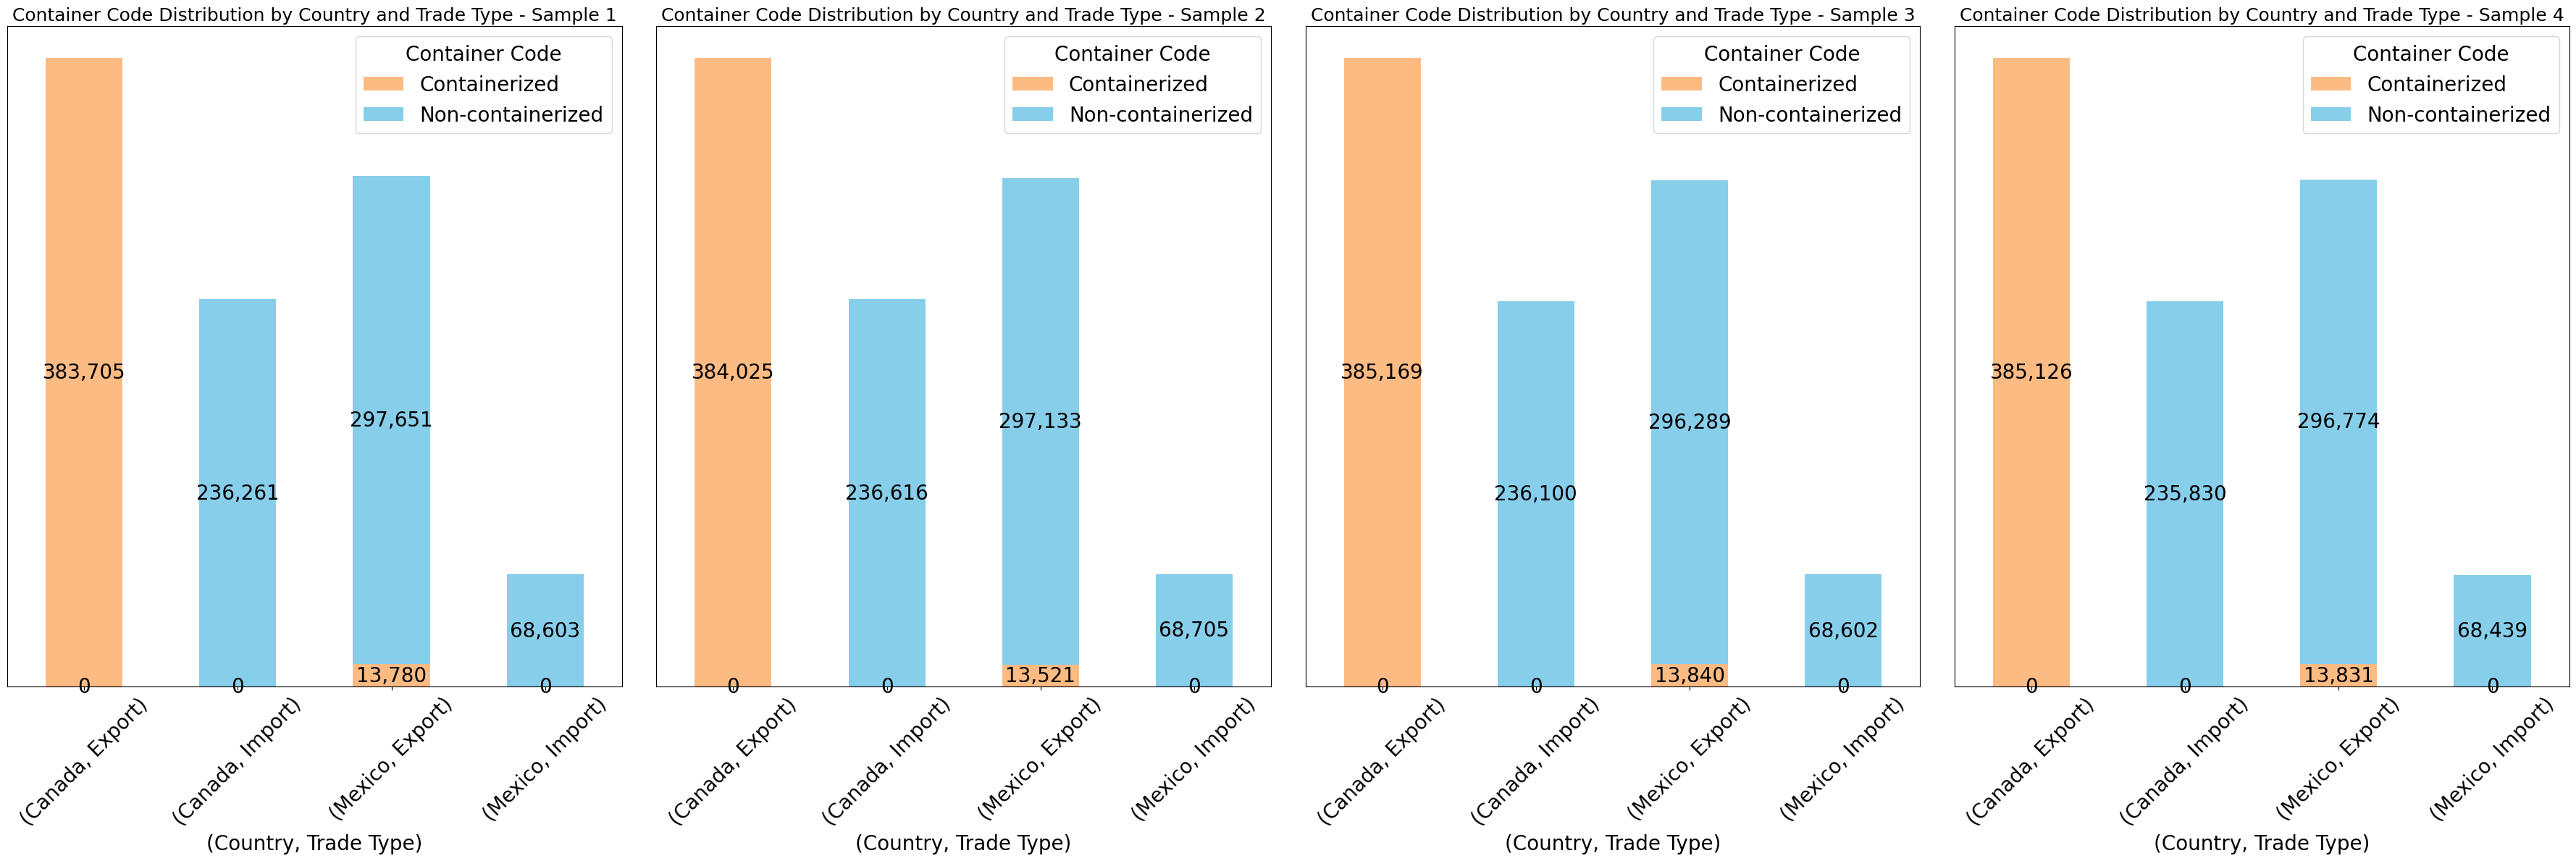

In [62]:
# Define the number of samples
num_samples = len(sampled_dataframes)

# Adjust figsize to accommodate multiple bars and labels for grouped plots
fig, axes = plt.subplots(1, num_samples, figsize=(9 * num_samples, 12))

# Ensure axes is always an array even for a single subplot
if num_samples == 1:
    axes = [axes]

# Define custom palettes 
trdtype_palette = {'Exort': 'skyblue', 'Import': 'lightcoral'}
contcode_palette = {'Non-containerized': 'skyblue', 'Containerized': '#fdbb84'}
country_palette = {'Canada': 'steelblue', 'Mexico': 'darkturquoise'}

# Define order for categories 
country_order = ['Canada', 'Mexico']
trdtype_order = ['Export', 'Import']
contcode_order = ['Non-containerized', 'Containerized']


# Iterate through each sampled DataFrame and create a stacked bar chart
for i, sample_df in enumerate(sampled_dataframes):
    # Select the appropriate axes for the current plot
    ax = axes[i]

    # Group by country, trdtype, and contcode and count occurrences
    grouped_data = sample_df.groupby(['country', 'trdtype', 'contcode'], observed=False).size().unstack(fill_value=0)

    # Create the stacked bar chart
    color_list = [contcode_palette.get(col, 'gray') for col in grouped_data.columns]
    grouped_data.plot(kind='bar', stacked=True, ax=ax, color=color_list)


    # Customize plot title and labels
    ax.set_title(f'Container Code Distribution by Country and Trade Type - Sample {i+1}', fontsize=18)
    ax.set_xlabel('(Country, Trade Type)', fontsize=20)
    ax.set_ylabel('Count', fontsize=18)
    ax.tick_params(axis='x', rotation=45, labelsize=20) 
    ax.tick_params(axis='y', labelsize=20)

    # Remove y-axis label because of the data label on the plot
    ax.yaxis.set_visible(False)

    # Add legend for container code
    ax.legend(title='Container Code', title_fontsize=20, fontsize=20)

    # Add data labels 
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.0f}', fontsize=20, label_type='center')


plt.tight_layout() 
plt.show()

From the plot I observed that the goods exported to Canada were all containerized while the goods imported to Canada were all Non-containerized. The highest count of goods that were exported to Canada and containerized was 385,169. The highest count of goods that were imported to Canada and non-containerized was 236,616.

I also observed that the goods exported to Mexico were mainly containerized with a few being non-containerized while the goods imported to Mexico were all Non-containerized. The highest count of goods that were exported to Mexico and containerized was 296,774 and the highest count of goods that were exported to Mexico and non-containerized was 13,840. The highest count of goods that were imported to Mexico and non-containerized was 68,705.